## Credit EDA - Tejas Thakur Notebook

### Problem Statement: Identify Factors that Drive Loan Default

Minimize 2 types of financial risk by discovering factors that majorly drive defaults on repayments.  
1. Credit Risk: Approving loans for applicants who will not be able to make timely repayments
2. Interest Risk: Rejecting loans for applicants who will be able to make timely repayments

In [1]:
# Importing the necessary libraries

import pandas as pd
pd.set_option("display.max_columns", 500)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seaborn as sns

%matplotlib inline
plt.style.use('default')

import warnings 
warnings.filterwarnings(action= 'ignore')

### Understanding Data

1. application_data.csv (inp1 dataframe): Data about the current application and whether or not the client has defaulted of any of the installments
2. previous_application.csv (inp0 dataframe): Data about any previous loan applications of a client

In [2]:
file_prev = 'previous_application.csv'
inp0 = pd.read_csv(file_prev)
inp0.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
inp0.shape

(1670214, 37)

In [4]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [5]:
file_app = 'application_data.csv'
inp1 = pd.read_csv(file_app)
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
inp1.shape

(307511, 122)

In [7]:
inp1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

#### Notes about inp0 and inp1 dataframe:
As observed there are columns with datatypes that might not exactly represent the values in the respective columns. There are also columns where a significant proportion of the values are missing, and the presence of outliers is also very likely. Particularly in inp1, the data is one of very high dimensionality which could make the analysis cumbersome. We will deal with these issues in next sections.

### Handling missing values

- Dropping columns where more than 25% of data is unavailable
- Imputing the remaining missing values with median for numerical variables and mode for categorical variables

##### inp1 Dataframe

In [8]:
missing_values = pd.DataFrame(inp1.isnull().sum()*100/len(inp1))
missing_values.reset_index(inplace = True)
missing_values.columns = ["Column Name", "Percent Missing"]

In [9]:
missing_values[missing_values["Percent Missing"] > 0]

,Column Name,Percent Missing
9,AMT_ANNUITY,0.003902
10,AMT_GOODS_PRICE,0.090403
11,NAME_TYPE_SUITE,0.420148
21,OWN_CAR_AGE,65.990810
28,OCCUPATION_TYPE,31.345545
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
119,AMT_REQ_CREDIT_BUREAU_MON,13.501631
120,AMT_REQ_CREDIT_BUREAU_QRT,13.501631


There are 62 columns in inp1 dataframe where more than 25% of the data is unavailable

In [10]:
len(missing_values[missing_values["Percent Missing"] > 0.25])

62

In [11]:
drop_cols = missing_values[missing_values["Percent Missing"] > 0.25]["Column Name"].tolist()
inp1.drop(labels=drop_cols, axis=1, inplace=True)

In [12]:
inp1.shape

(307511, 60)

In [13]:
inp1.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
CNT_FAM_MEMBERS                  2
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT

In [14]:
inp1.AMT_ANNUITY.fillna(inp1.AMT_ANNUITY.median(), inplace=True)

In [15]:
inp1.AMT_GOODS_PRICE.fillna(inp1.AMT_GOODS_PRICE.median(), inplace=True)

In [16]:
inp1.CNT_FAM_MEMBERS.fillna(inp1.CNT_FAM_MEMBERS.mode(), inplace=True)

In [17]:
inp1.EXT_SOURCE_2.fillna(inp1.EXT_SOURCE_2.median(), inplace=True)

In [18]:
inp1.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_

##### inp0 Dataframe

In [19]:
missing_values = pd.DataFrame(inp0.isnull().sum()*100/len(inp0))
missing_values.reset_index(inplace = True)
missing_values.columns = ["Column Name", "Percent Missing"]
missing_values

,Column Name,Percent Missing
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,AMT_ANNUITY,22.286665
4,AMT_APPLICATION,0.000000
5,AMT_CREDIT,0.000060
6,AMT_DOWN_PAYMENT,53.636480
7,AMT_GOODS_PRICE,23.081773
8,WEEKDAY_APPR_PROCESS_START,0.000000
9,HOUR_APPR_PROCESS_START,0.000000


In [20]:
len(missing_values[missing_values["Percent Missing"] > 0.25])

14

In [21]:
drop_cols = missing_values[missing_values["Percent Missing"] > 0.25]["Column Name"].tolist()
inp0.drop(labels=drop_cols, axis=1, inplace=True)

In [22]:
inp0.shape

(1670214, 23)

In [23]:
inp0.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_APPLICATION                  0
AMT_CREDIT                       1
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

In [24]:
inp0.PRODUCT_COMBINATION.fillna(inp0.PRODUCT_COMBINATION.mode(), inplace=True)

### Column Data Manipulation

- Converting days_birth data to age of the client
- Converting days_employed to years_employed

In [25]:
inp1["AGE"] = round(inp1.DAYS_BIRTH.abs()/365)
inp1.drop("DAYS_BIRTH", axis = 1, inplace=True)

In [26]:
inp1["AGE"].describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

In [27]:
inp1["YEARS_EMPLOYED"] = inp1.DAYS_EMPLOYED.abs()/365
inp1.drop("DAYS_EMPLOYED", axis=1, inplace=True)

In [28]:
inp1.YEARS_EMPLOYED.describe()

count    307511.000000
mean        185.547239
std         382.037676
min           0.000000
25%           2.556164
50%           6.079452
75%          15.635616
max        1000.665753
Name: YEARS_EMPLOYED, dtype: float64

In [29]:
inp1["YEARS_EMPLOYED"] = inp1.apply(lambda x: x["AGE"] - 20 if x["YEARS_EMPLOYED"]>100 else x["YEARS_EMPLOYED"], axis=1)

In [30]:
inp1["YEARS_EMPLOYED"].describe()

count    307511.000000
mean         12.515043
std          14.216832
min           0.000000
25%           2.556164
50%           6.073973
75%          15.501370
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

### Assessing column datatypes

The columns have the correct datatype with respect to the information that is represented

In [31]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [32]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

### Checking for data imbalance
8% of clients from the applicants dataset are considered to be defaulters. The dataset can therefore said to be imbalanced

In [33]:
len(inp1[inp1.TARGET == 1])*100/len(inp1)

8.072881945686495

In [34]:
repeat_applications = [id for id in inp1[inp1.TARGET==1].SK_ID_CURR if id in inp0.SK_ID_CURR]
len(repeat_applications)/len(inp1[inp1.TARGET==1])

1.0

### Univariate Analysis for Numerical Variables


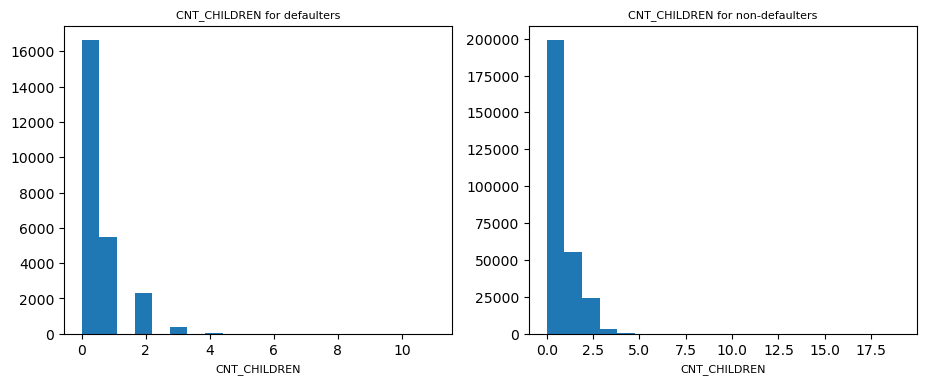

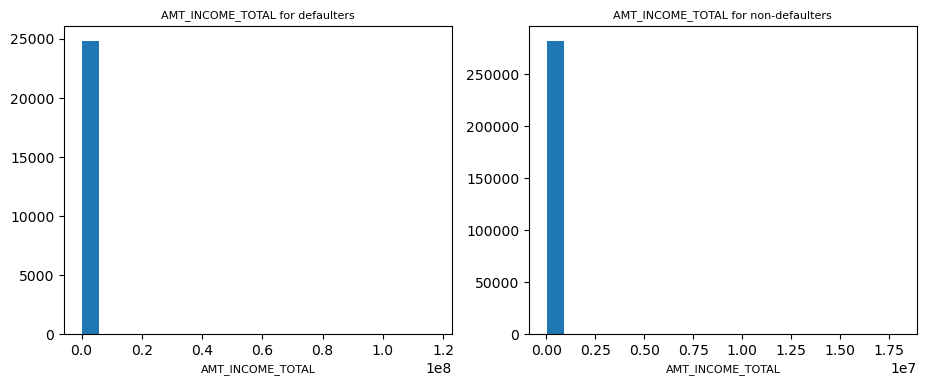

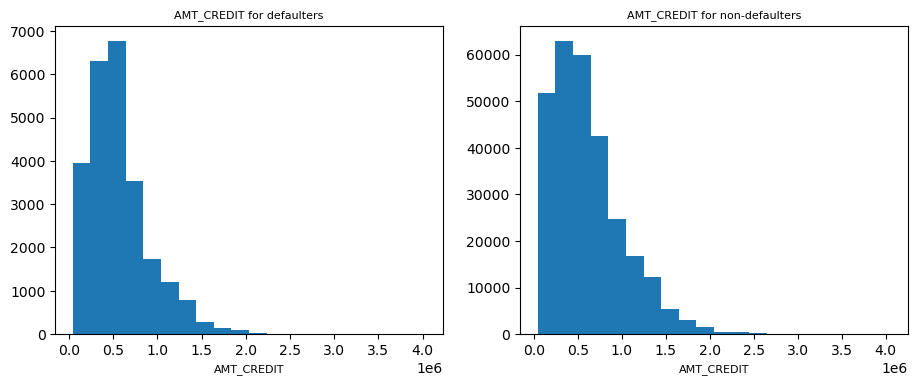

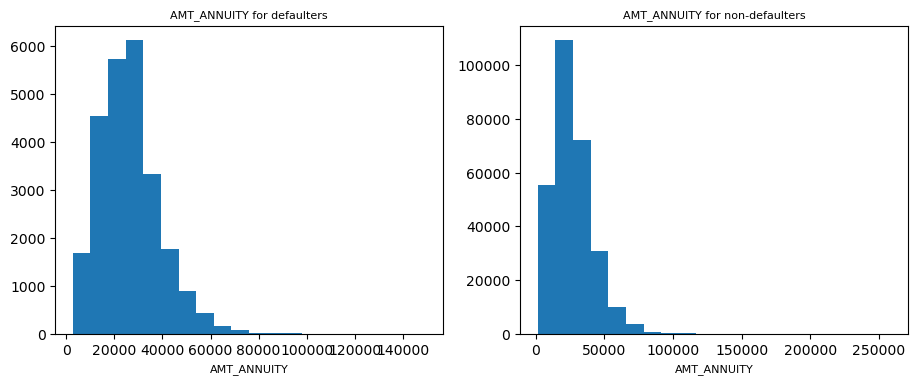

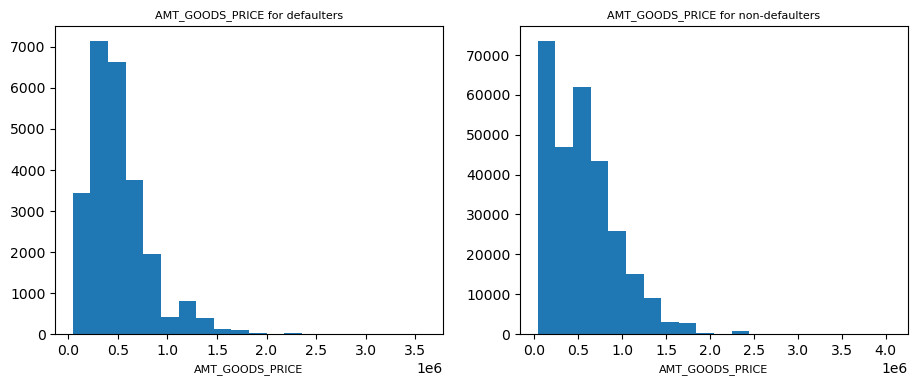

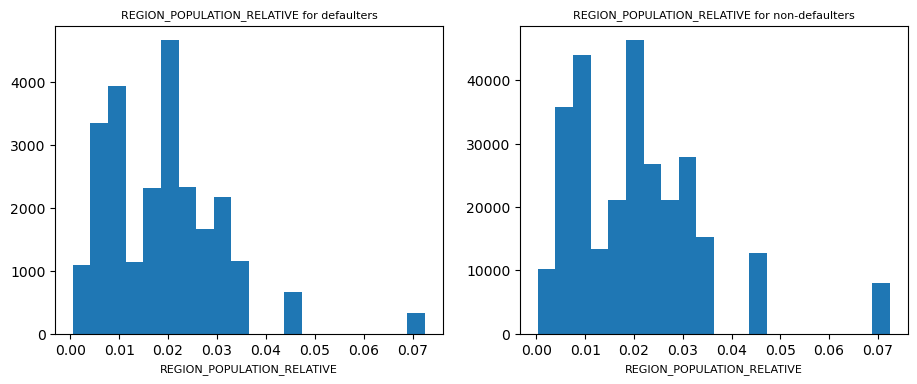

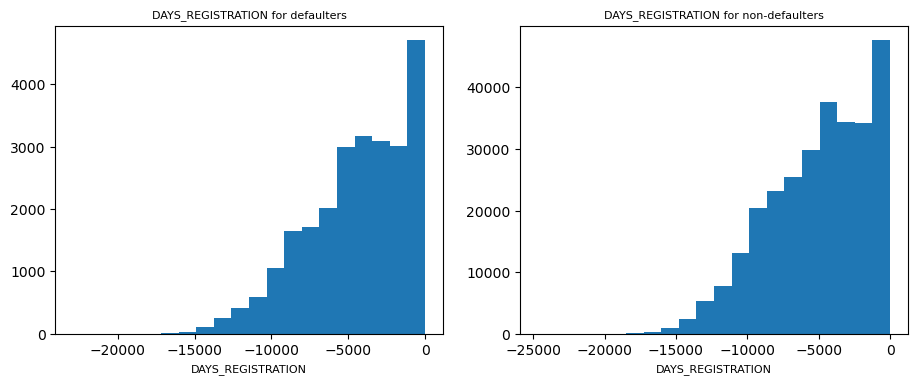

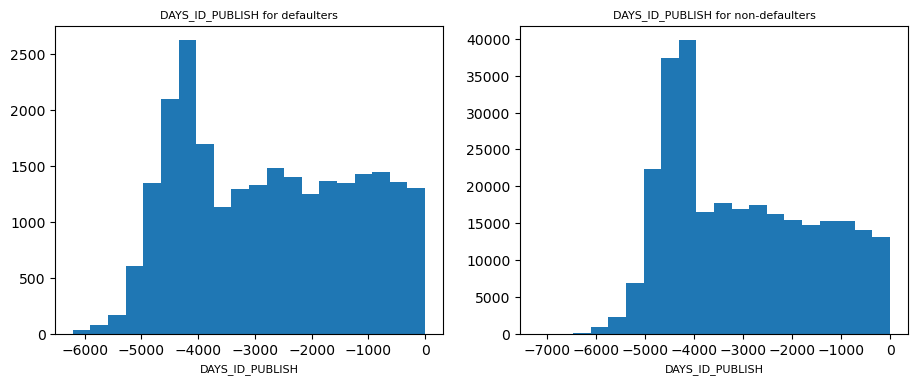

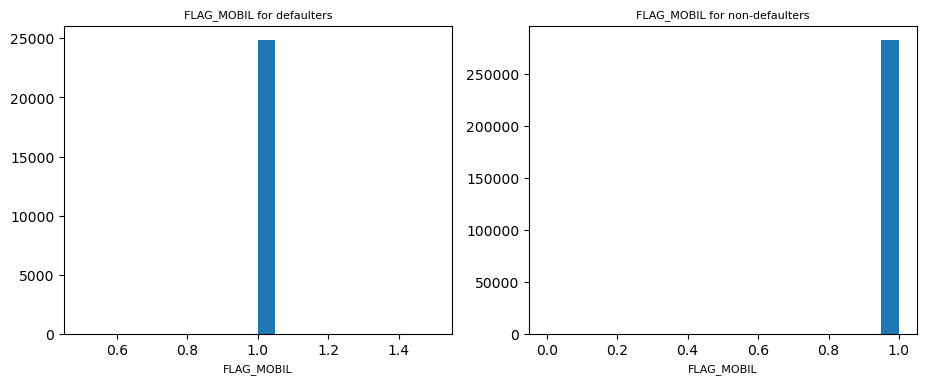

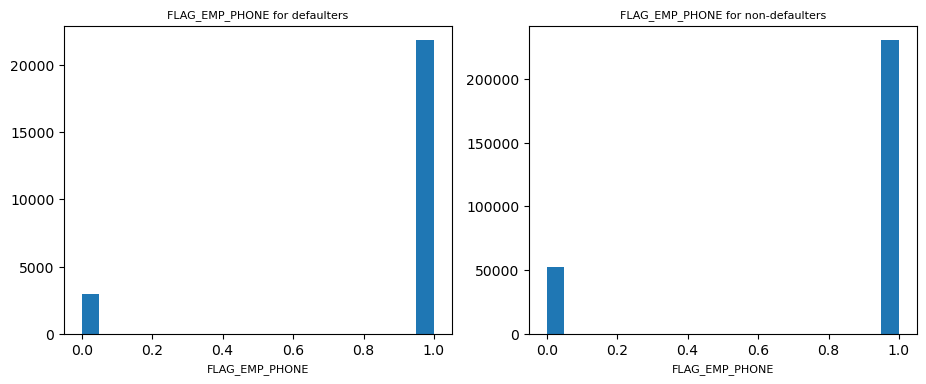

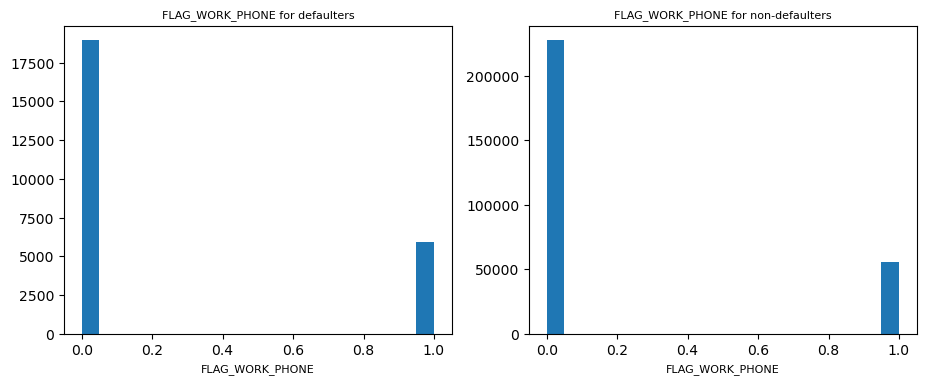

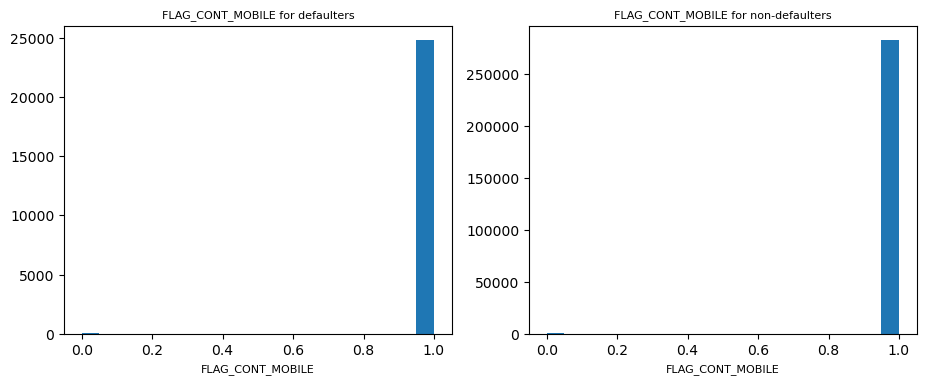

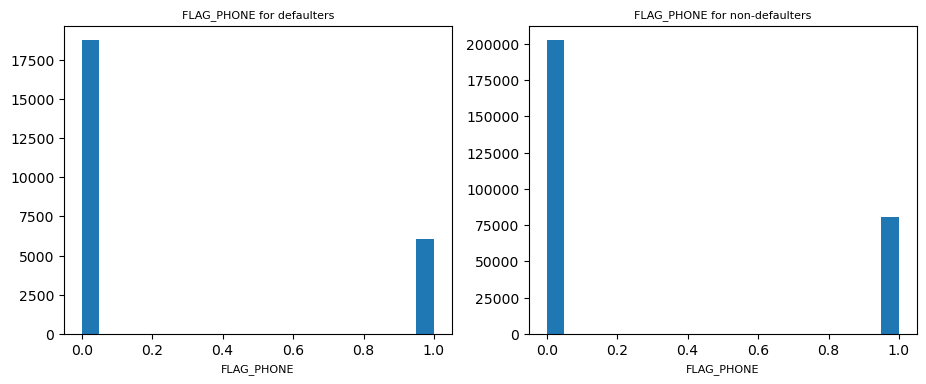

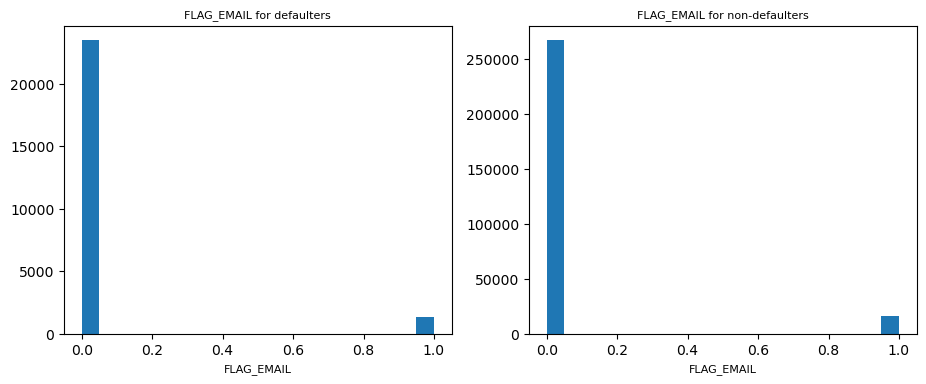

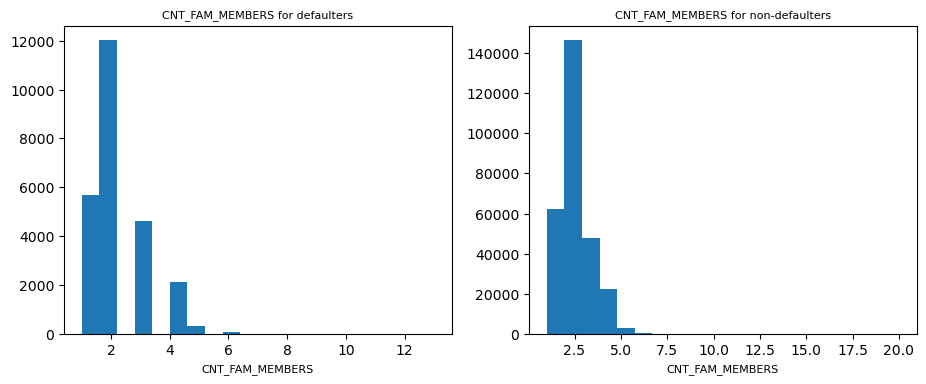

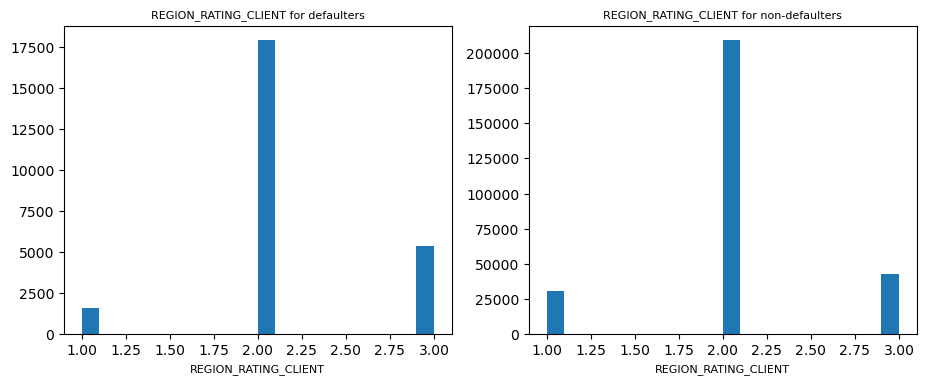

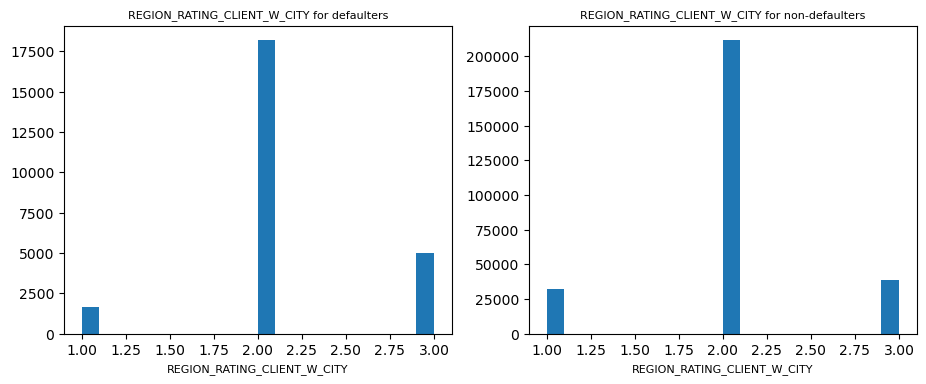

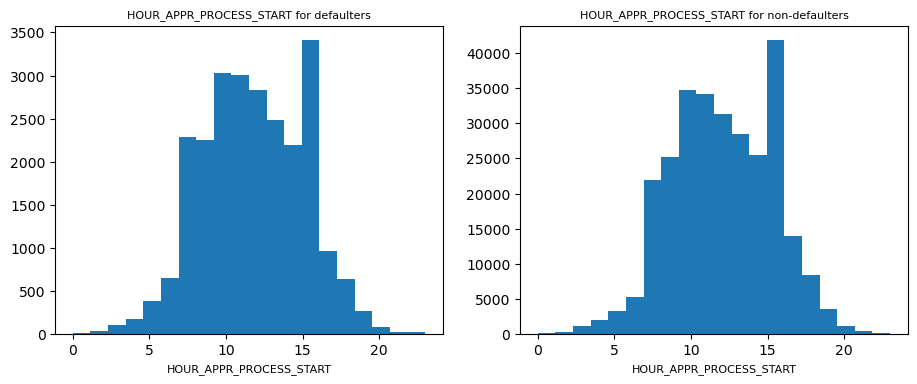

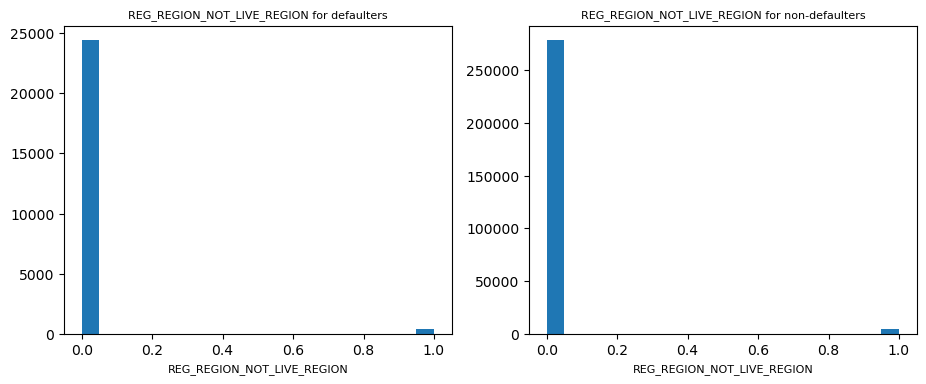

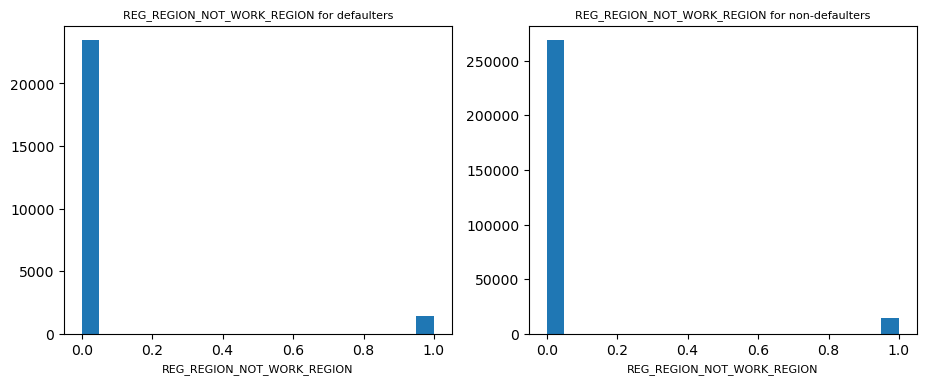

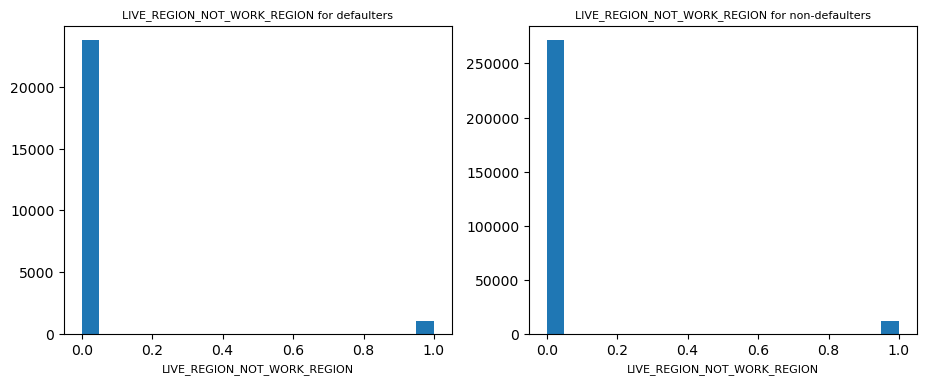

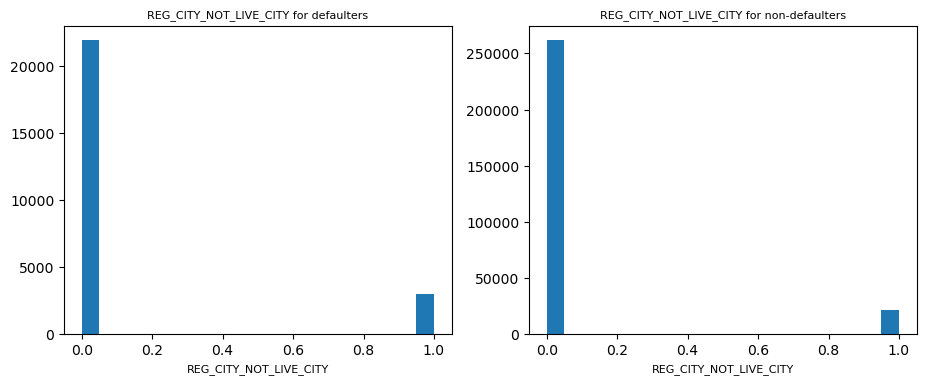

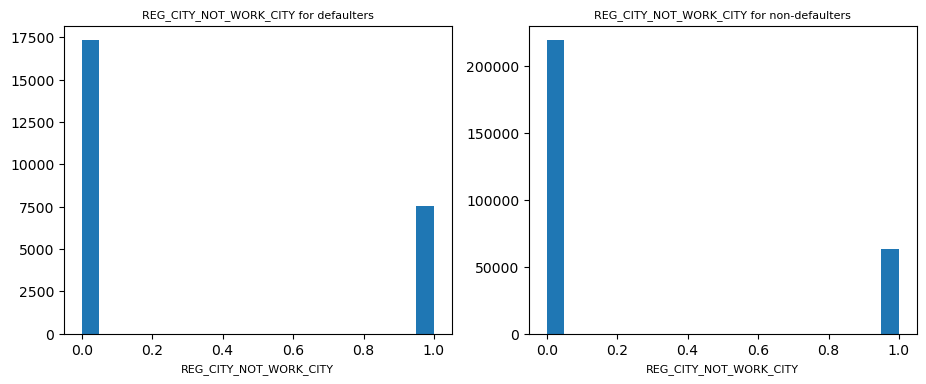

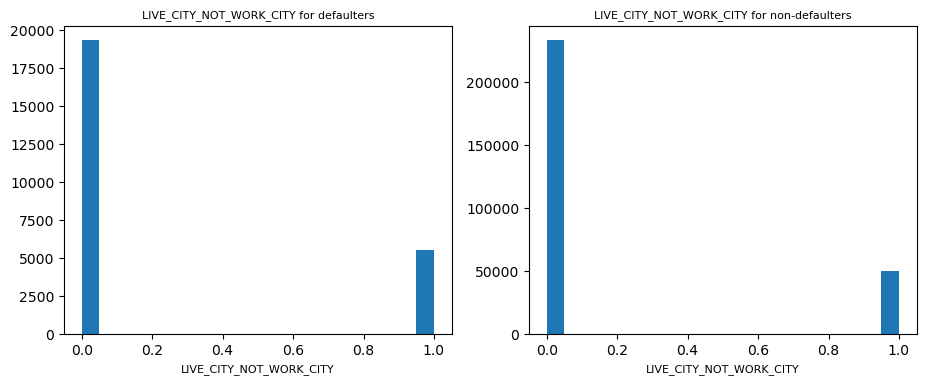

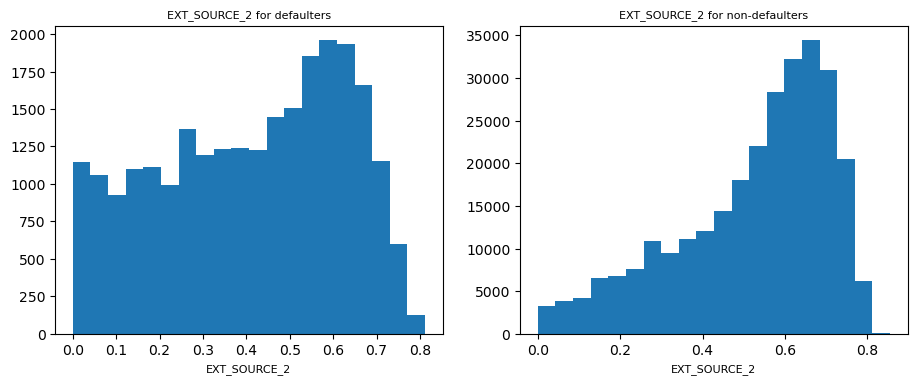

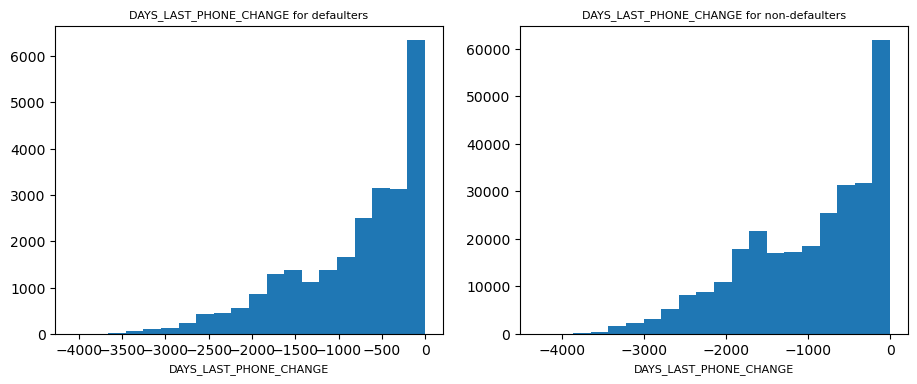

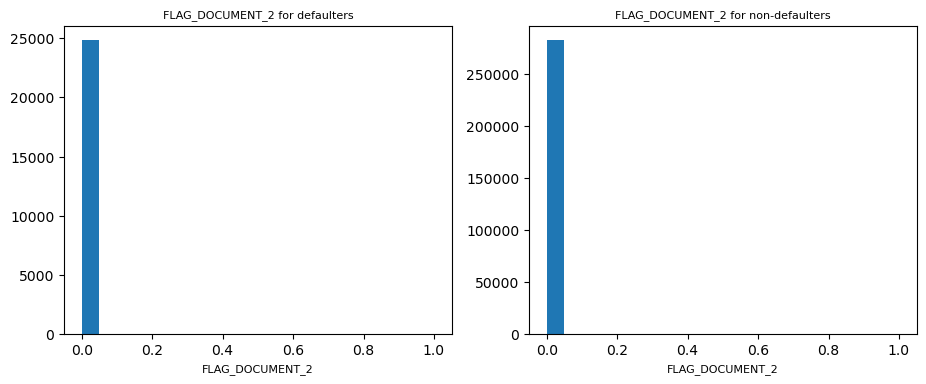

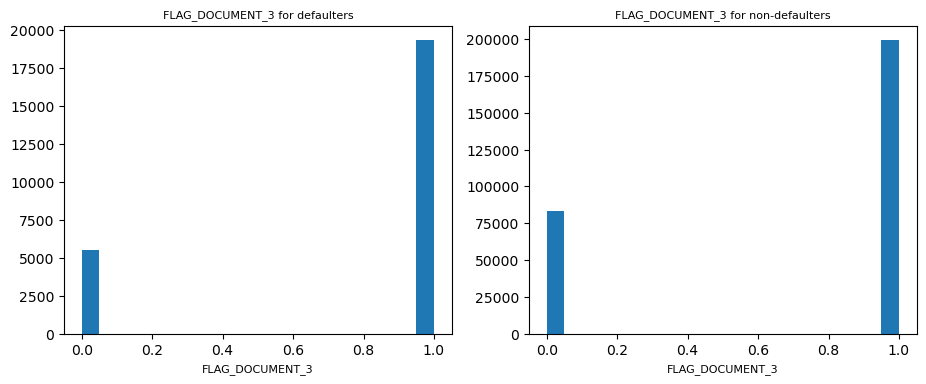

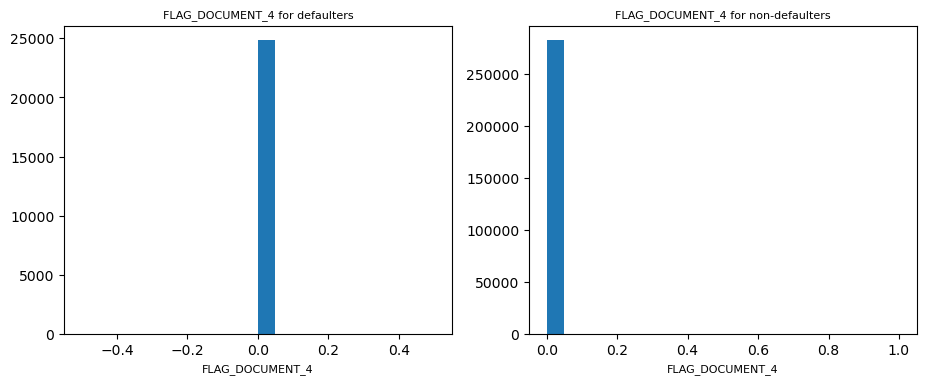

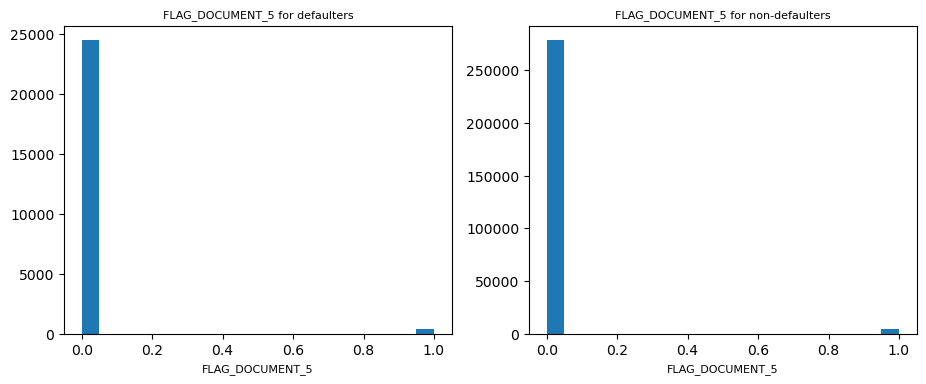

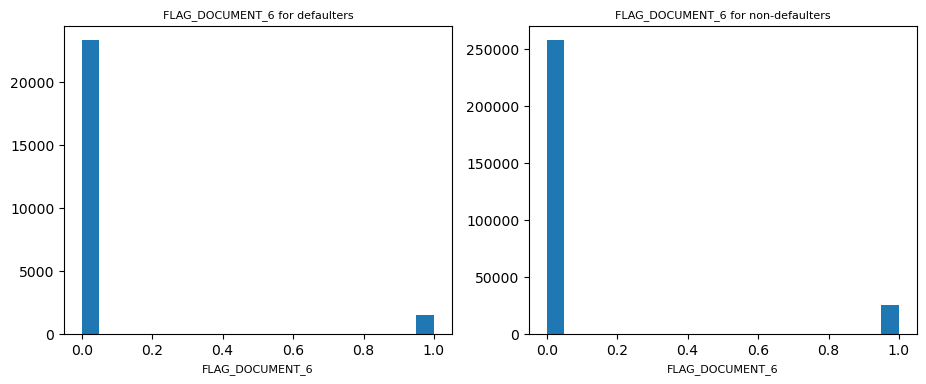

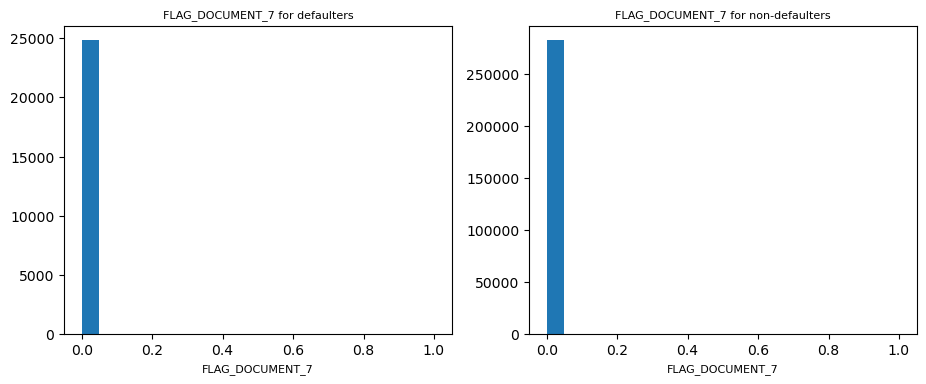

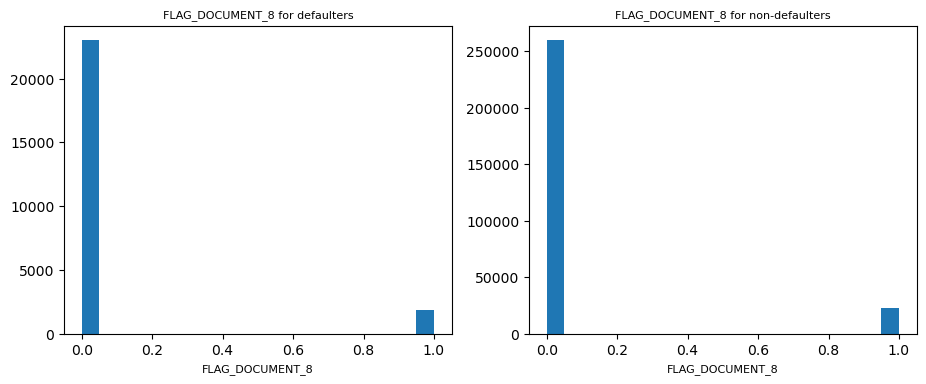

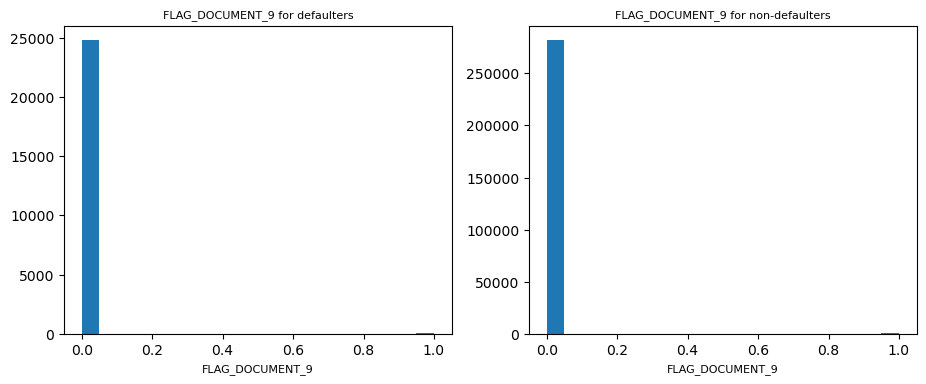

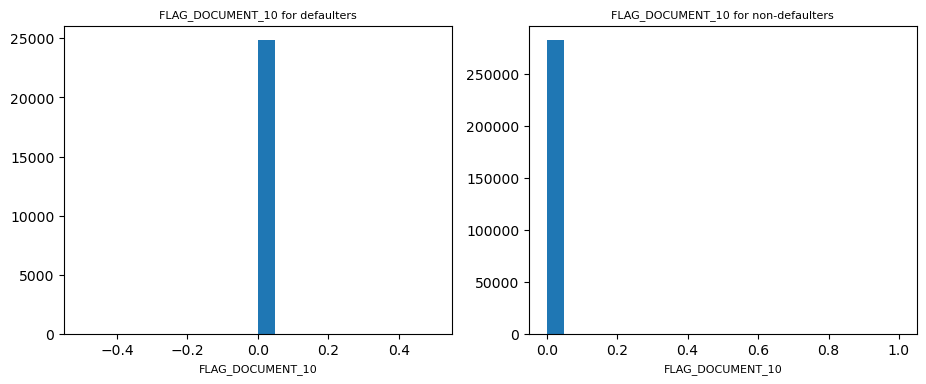

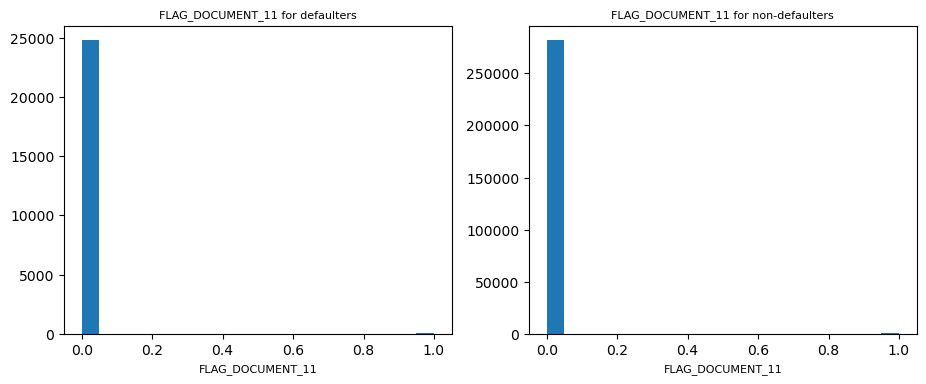

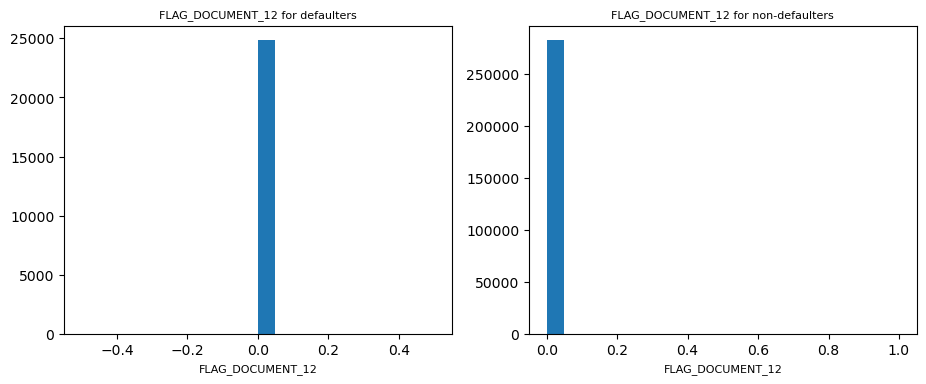

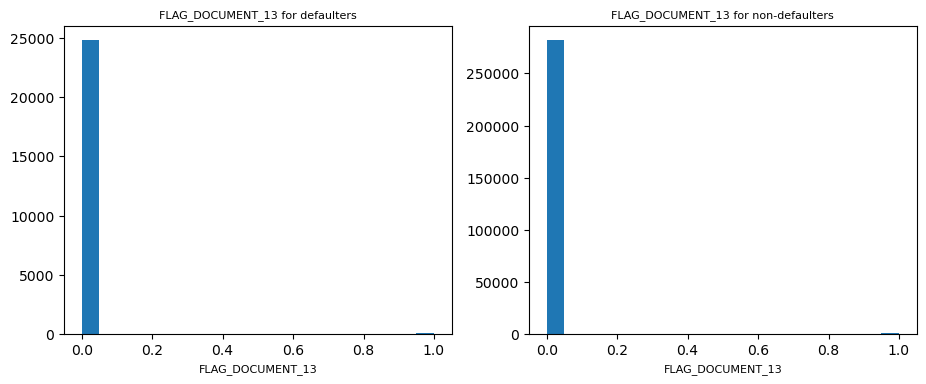

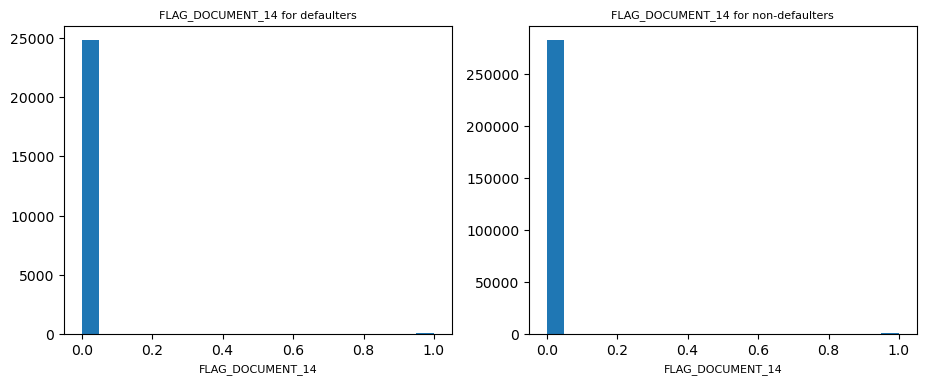

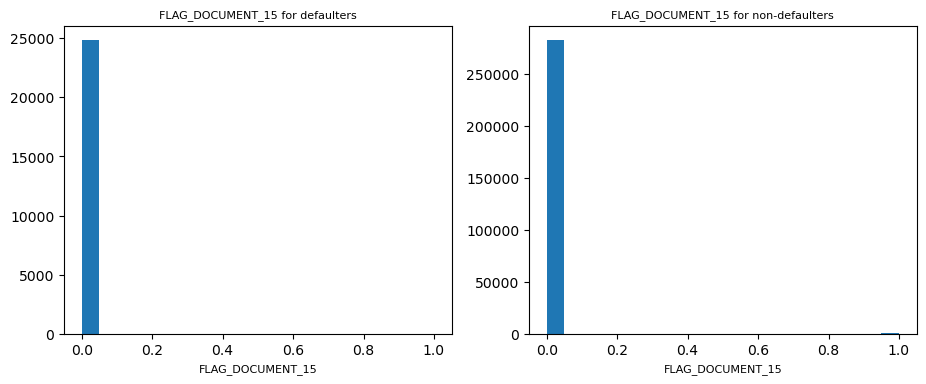

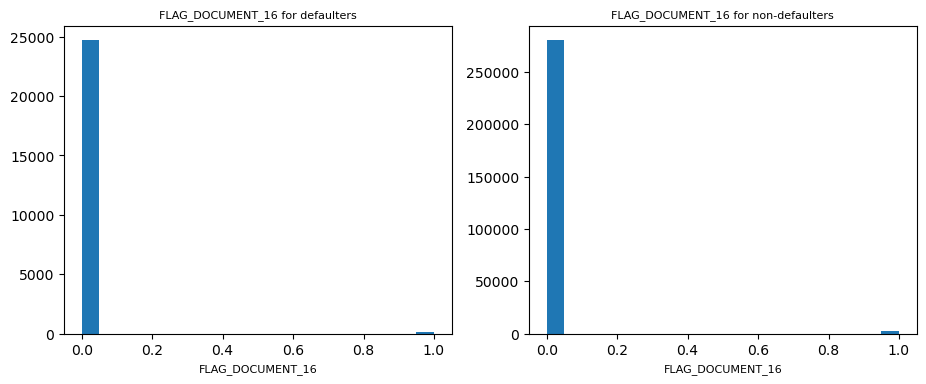

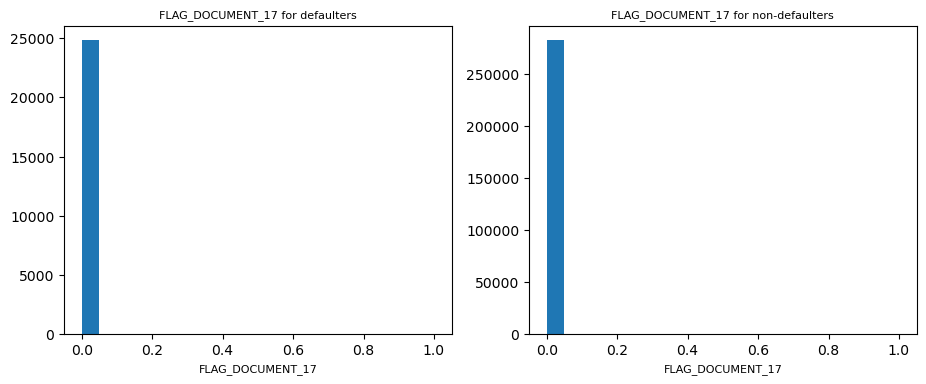

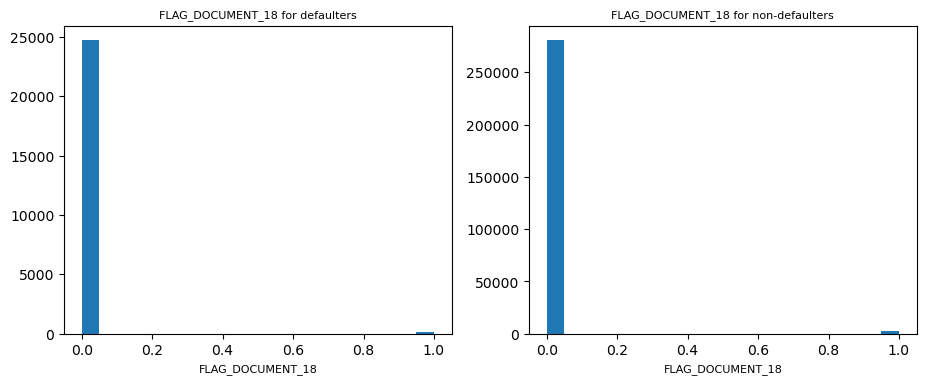

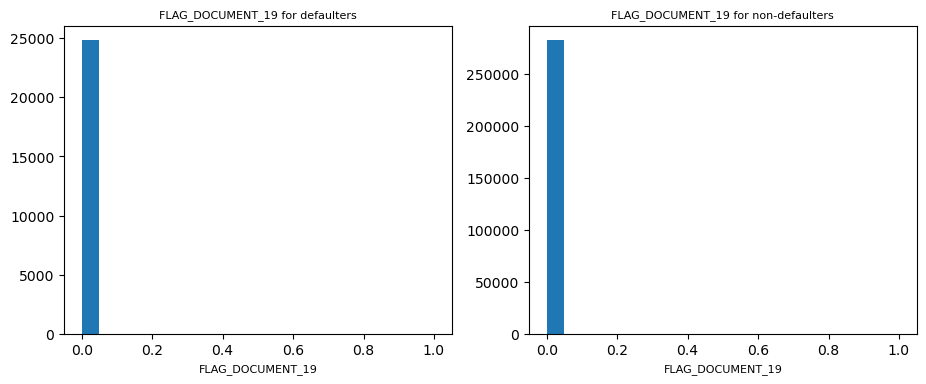

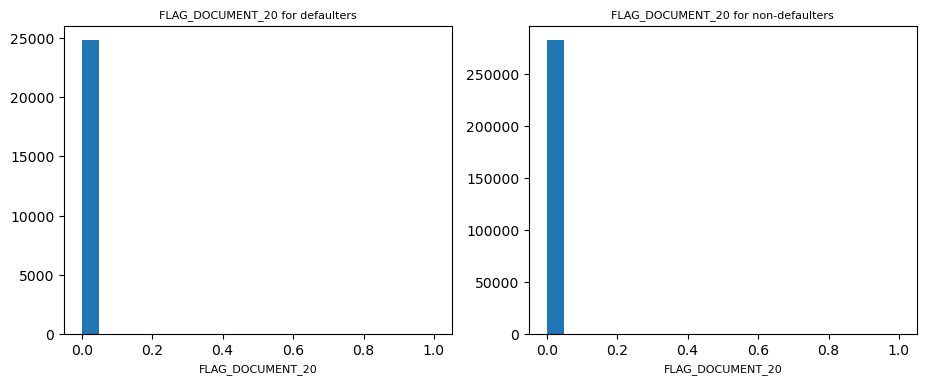

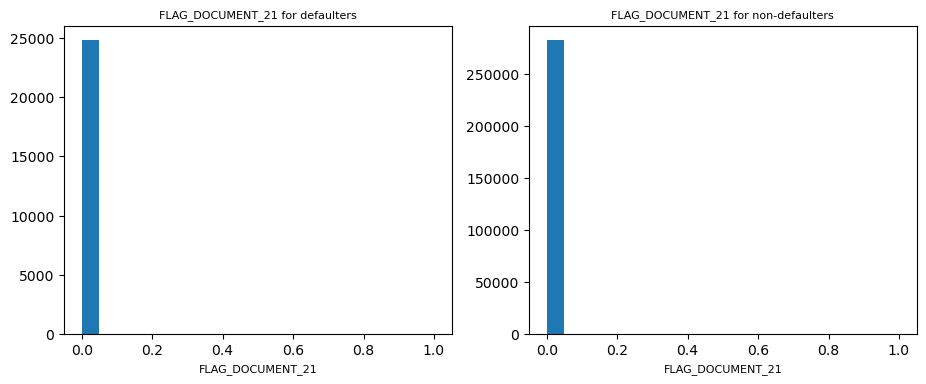

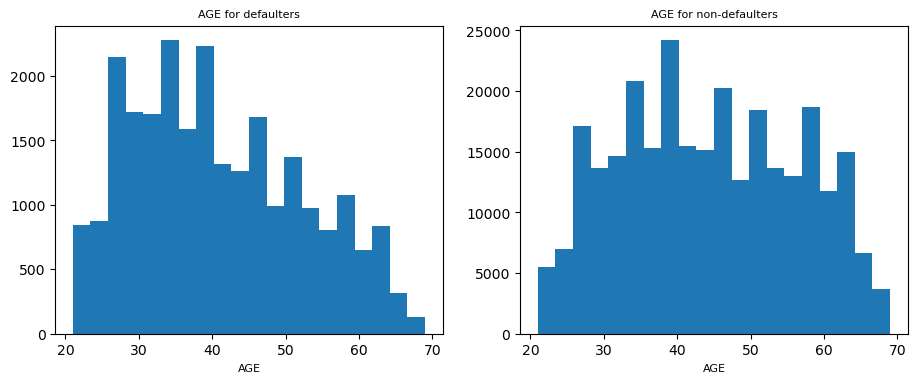

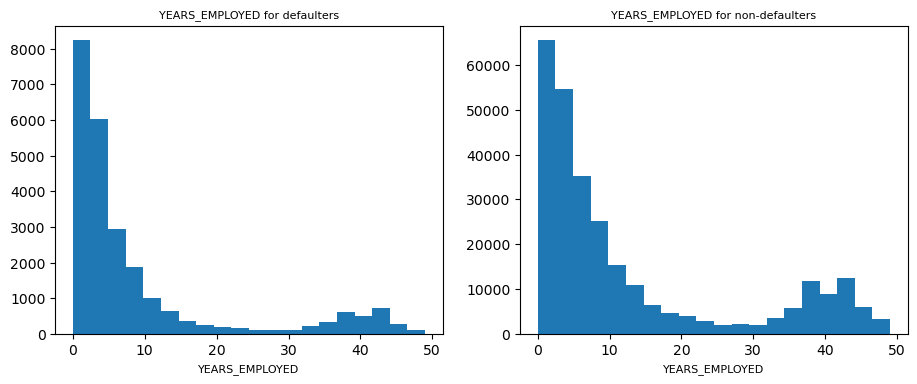

In [44]:
for col in inp1.columns[2:]:
    if col in inp1.describe().columns:
        
        plt.figure(figsize=[11,4])
        
        plt.subplot(121)
        plt.hist(inp1[inp1.TARGET == 1][col], bins = 20)
        plt.title(col + " for defaulters", fontdict={"fontsize":8})
        plt.xlabel(col, fontdict={"fontsize":8})
        
        plt.subplot(122)
        plt.hist(inp1[inp1.TARGET == 0][col], bins = 20)
        plt.title(col + " for non-defaulters", fontdict={"fontsize":8})
        plt.xlabel(col, fontdict={"fontsize":8})
        
        plt.show()

### Univariate Analysis for Categorical Variables


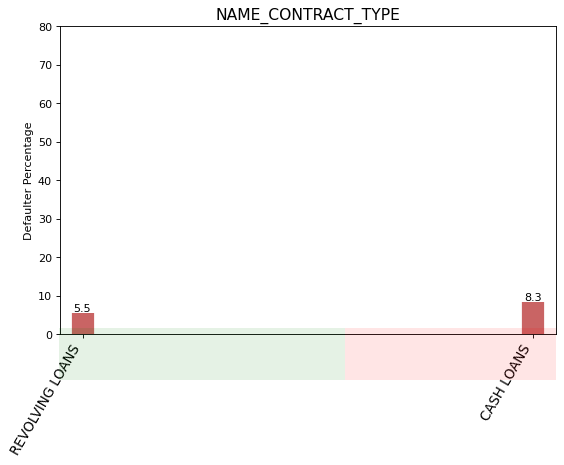

posx and posy should be finite values
posx and posy should be finite values


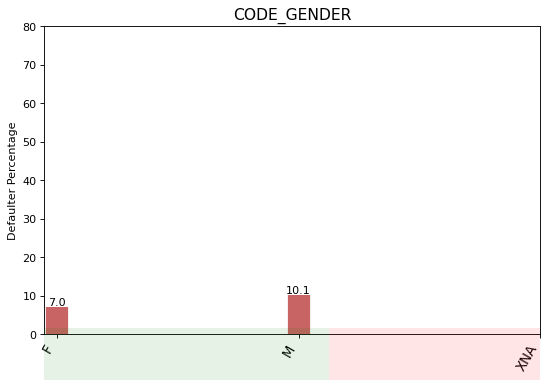

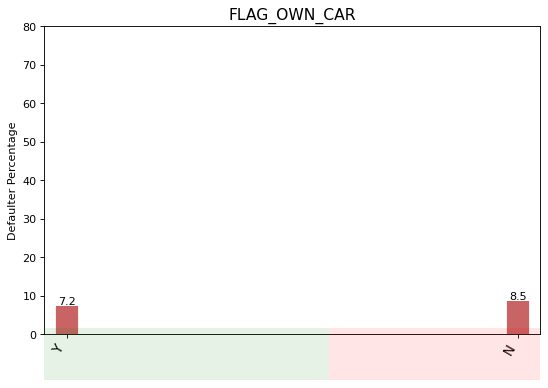

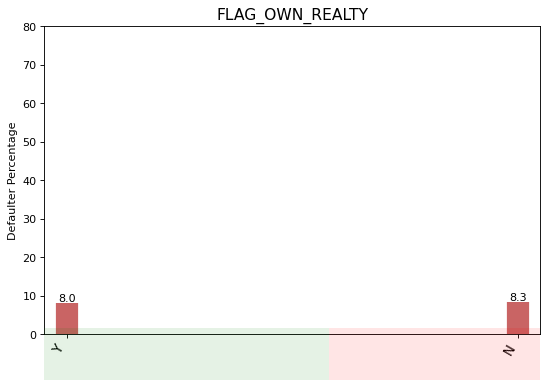

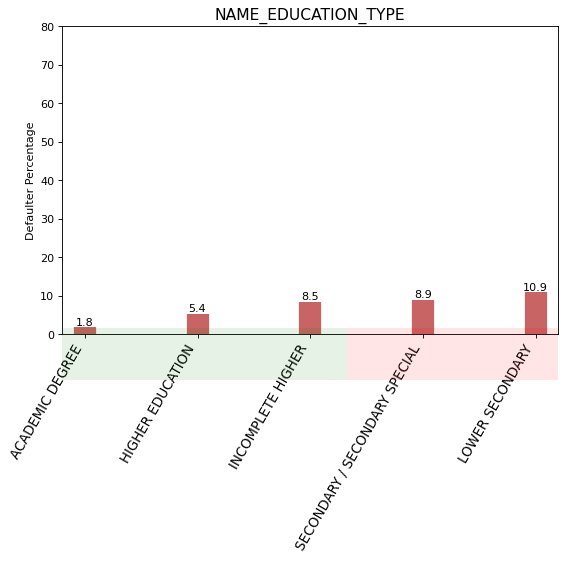

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


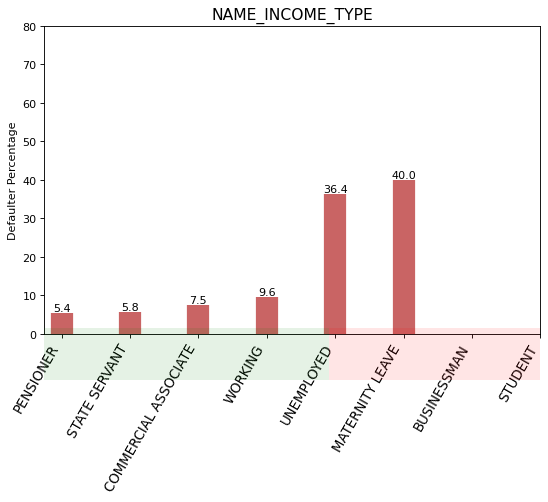

posx and posy should be finite values
posx and posy should be finite values


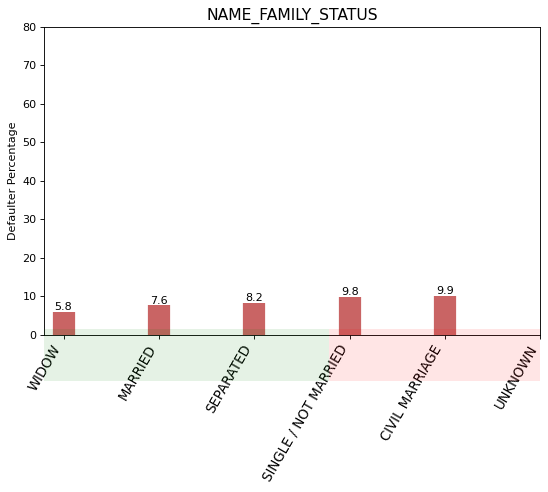

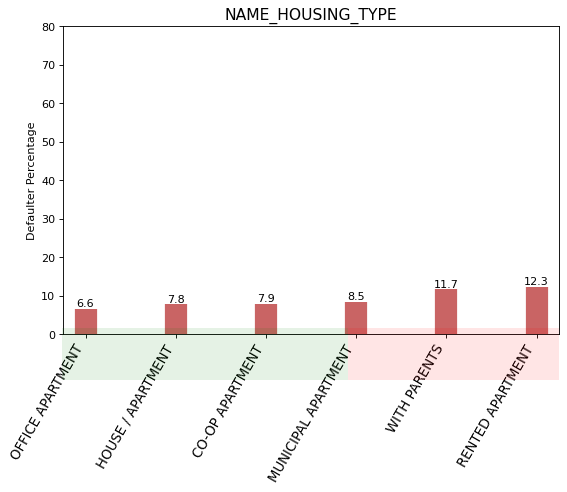

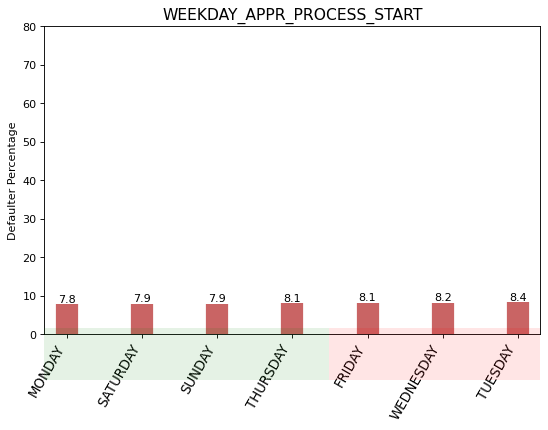

In [43]:
cat_cols = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_EDUCATION_TYPE", 
            "NAME_INCOME_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","WEEKDAY_APPR_PROCESS_START"]

for col in cat_cols:  
    
    df = pd.DataFrame( (inp1[inp1.TARGET == 1][col].value_counts()*100)/
                                      (inp1[col].value_counts()) )

    df.sort_values(col,inplace=True)
    df.reset_index(inplace = True)
    df.columns = [col,"Default_Percent"]
    df.Default_Percent.fillna(0)

    # Setting up chart area
    fig, ax = plt.subplots(figsize=(8,5), facecolor='white', dpi= 80)
    ax.vlines(x=df.index, ymin=0, ymax=df.Default_Percent, color='firebrick', alpha=0.7, linewidth=20)

    # Annotate Text
    for i, Default_Percent in enumerate(df.Default_Percent):
        ax.text(i, Default_Percent+0.5, round(Default_Percent, 1), horizontalalignment='center')


    # Title, Label, Ticks and Ylim
    ax.set_title(col, fontdict={'size':14})
    ax.set(ylabel='Defaulter Percentage', ylim=(0, 80))
    plt.xticks(df.index, df[col].str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

    # Add patches to color the X axis labels
    p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
    p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
    fig.add_artist(p1)
    fig.add_artist(p2)
    plt.show()

#### Insights for Univariate analysis
- When compared to non-defaulters, defaulters has similar percentage distribution among the following categories
    - Contract type
    - Gender of applicant
    - Car and realty ownership
- Number of children, income, credit amount, annuity, and goods price have outliers in the data
- Defaulters seem to be concentrated at more towards the low credit amount and low income range
- A significantly high proportion of defaulters are in the lower range of ext_source_2
- Working clients are most common in both defaulters and non-defaulters
- Segmented univariate analysis will be performed for education type, family status, income type, and housing type
- Proportionaly speaking, defaulters seem to be skewed towards regions of lower population density (REGION_POPULATION_RELATIVE)
- There are quite a few binary categorical columns which are almost a constant, we can consider dropping these columns from the analysis

#### DROPPING COLUMNS THAT ARE ALMOST A CONSTANT
Dropping columns in current applicants where the column values are alomst a constant.
That is, if the proportion of sum is really close to 0 or 1

In [38]:
df = pd.DataFrame(inp1[["REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY"
    ,"REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"]].sum()*100/len(inp1)).reset_index()
df.columns = ["Column", "Flag Percent"]
df

,Column,Flag Percent
0,REG_REGION_NOT_LIVE_REGION,1.514417
1,REG_REGION_NOT_WORK_REGION,5.076892
2,LIVE_REGION_NOT_WORK_REGION,4.065871
3,REG_CITY_NOT_LIVE_CITY,7.817281
4,REG_CITY_NOT_WORK_CITY,23.045354
5,LIVE_CITY_NOT_WORK_CITY,17.955455


In [39]:
drop_cols = df[(df["Flag Percent"] < 2)]["Column"].tolist()

In [40]:
drop_cols

['REG_REGION_NOT_LIVE_REGION']

In [41]:
inp1.drop(drop_cols, axis=1, inplace=True)

In [42]:
df = pd.DataFrame(inp1[[col for col in inp1.columns if "FLAG" in col][2:]].sum()/len(inp1)).reset_index()
df.columns = ["Column", "Flag Percent"]
df

,Column,Flag Percent
0,FLAG_MOBIL,0.999997
1,FLAG_EMP_PHONE,0.819889
2,FLAG_WORK_PHONE,0.199368
3,FLAG_CONT_MOBILE,0.998133
4,FLAG_PHONE,0.281066
5,FLAG_EMAIL,0.056720
6,FLAG_DOCUMENT_2,0.000042
7,FLAG_DOCUMENT_3,0.710023
8,FLAG_DOCUMENT_4,0.000081
9,FLAG_DOCUMENT_5,0.015115


In [43]:
drop_cols = df[(df["Flag Percent"] < 0.01)]["Column"].tolist()
drop_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [44]:
drop_cols.extend(df[(df["Flag Percent"] > 0.9)]["Column"].tolist())
drop_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_MOBIL',
 'FLAG_CONT_MOBILE']

In [45]:
inp1.drop(drop_cols, axis=1, inplace=True)

#### Columns of interest:
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_GOODS_PRICE
- AMT_ANNUITY
- REGION_POPULATION_RELATIVE
- AGE
- NAME_HOUSING_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_INCOME_TYPE
- ORGANIZATION_TYPE

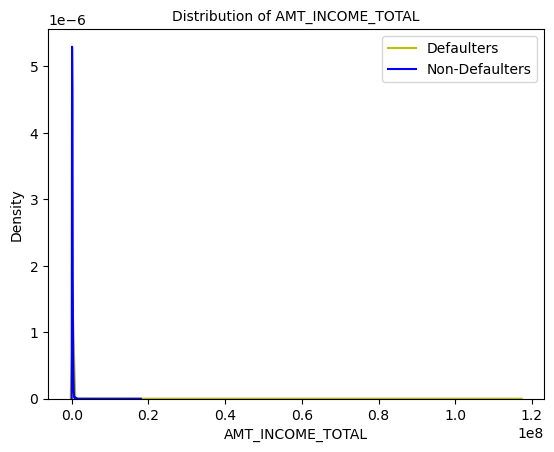

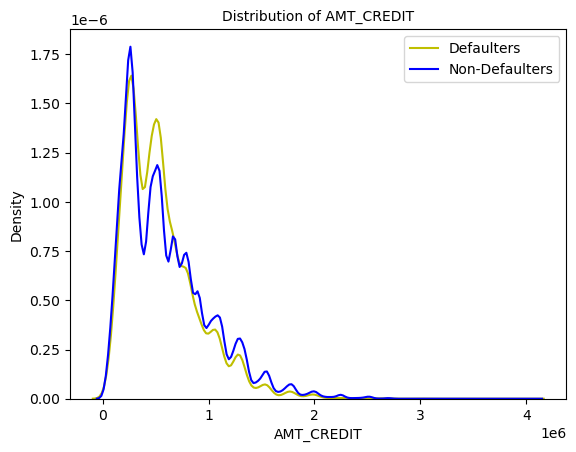

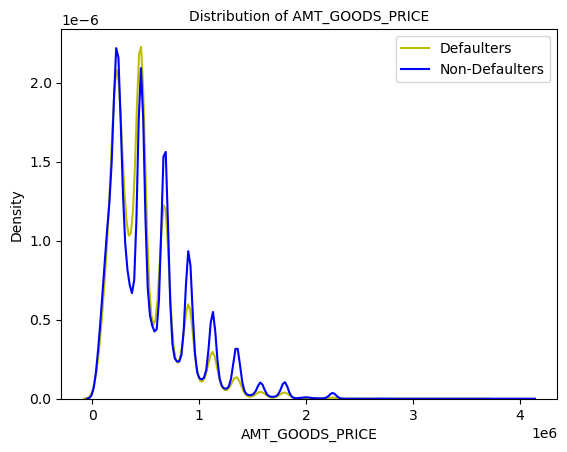

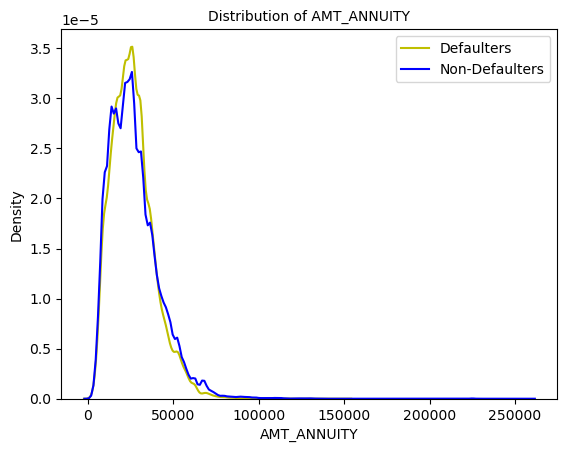

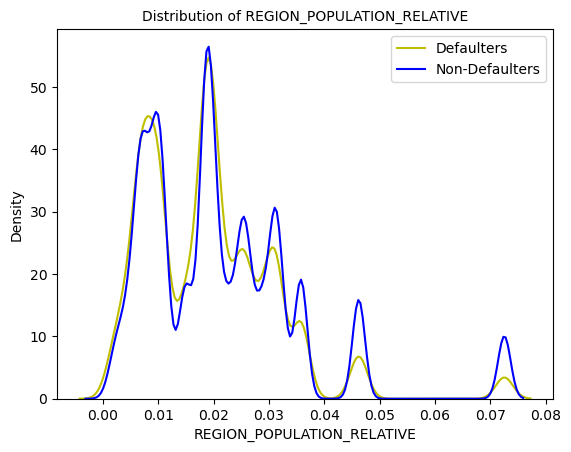

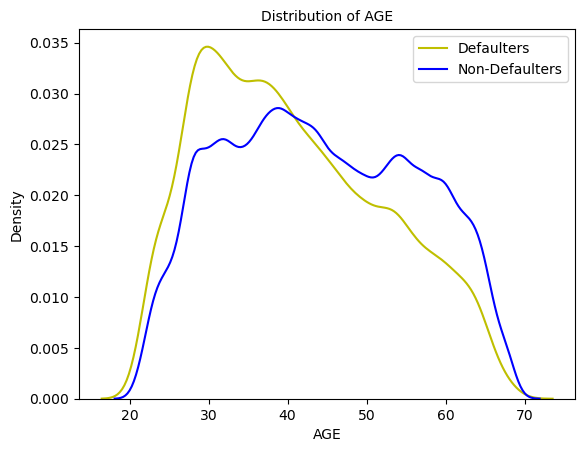

In [46]:
for col in ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_GOODS_PRICE", "AMT_ANNUITY", "REGION_POPULATION_RELATIVE","AGE"]:
    sns.distplot(inp1[inp1.TARGET == 1][col], hist = False, color="y", label="Defaulters")
    sns.distplot(inp1[inp1.TARGET == 0][col], hist = False, color="b", label="Non-Defaulters")
    
    plt.title("Distribution of " + col, fontdict={"fontsize":10})
    plt.legend()
    
    plt.show()

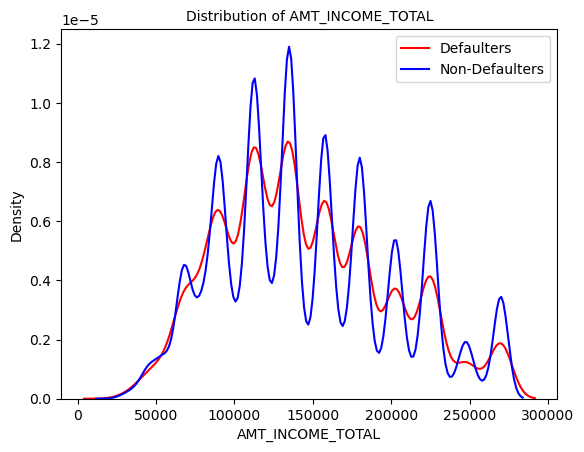

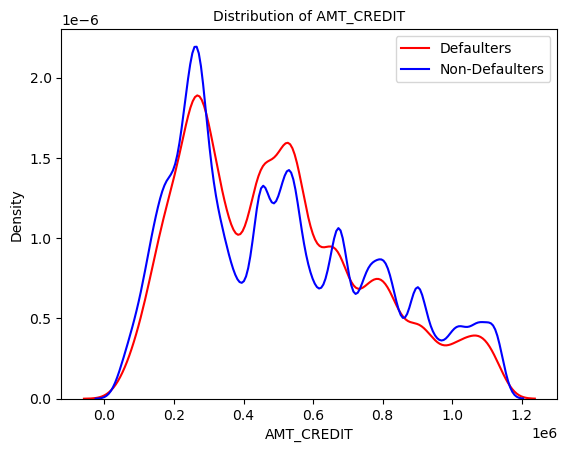

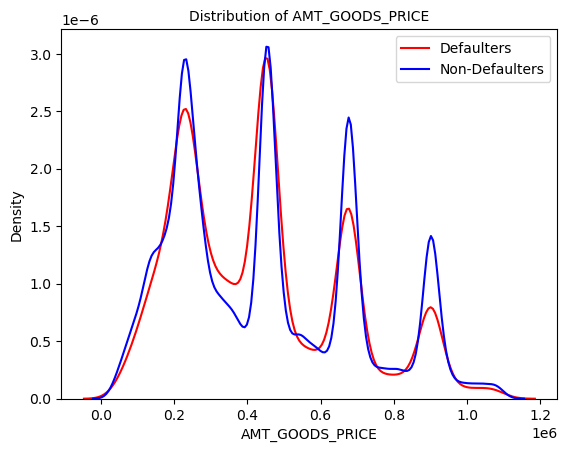

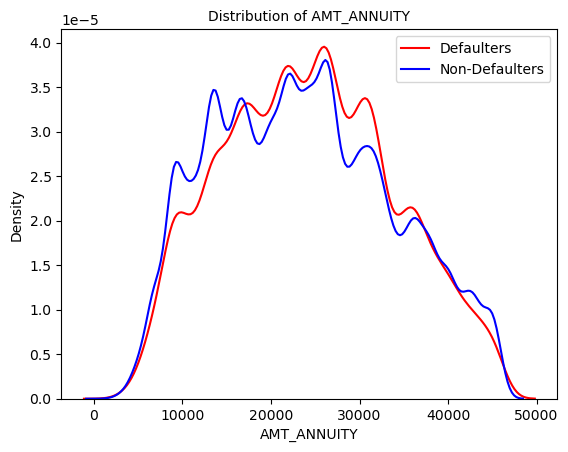

In [47]:
for col in ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_GOODS_PRICE", "AMT_ANNUITY"]:
    
    df = inp1[inp1[col] <= np.quantile(inp1[col],0.9)]

    sns.distplot(df[inp1.TARGET == 1][col], hist = False, color="r", label="Defaulters")
    sns.distplot(df[inp1.TARGET == 0][col], hist = False, color="b", label="Non-Defaulters")
    
    plt.title("Distribution of " + col, fontdict={"fontsize":10})
    plt.legend()
    
    plt.show()

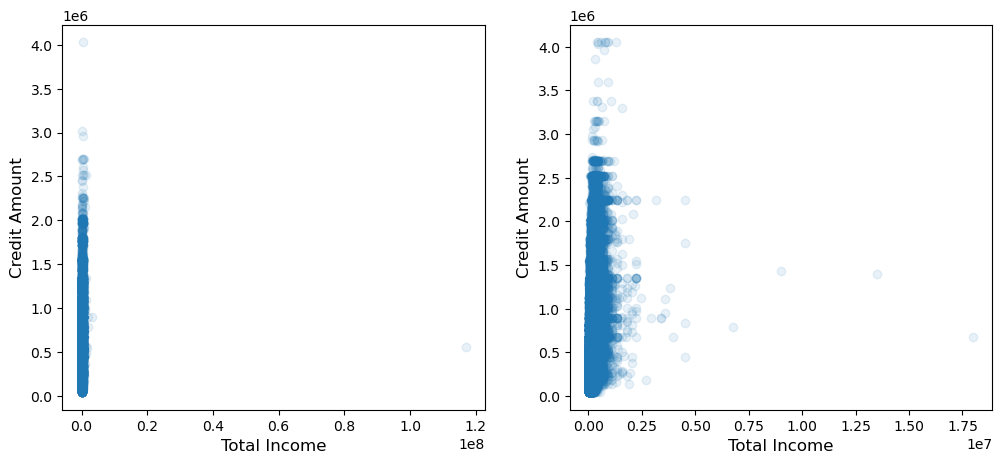

In [48]:
plt.figure(figsize=[12,5])

plt.subplot(121)
plt.scatter(inp1[inp1.TARGET == 1].AMT_INCOME_TOTAL, inp1[inp1.TARGET == 1].AMT_CREDIT, alpha = 0.1)
plt.xlabel("Total Income", fontdict={"fontsize":12})
plt.ylabel("Credit Amount", fontdict={"fontsize":12})

plt.subplot(122)
plt.scatter(inp1[inp1.TARGET == 0].AMT_INCOME_TOTAL, inp1[inp1.TARGET == 0].AMT_CREDIT, alpha = 0.1)
plt.xlabel("Total Income", fontdict={"fontsize":12})
plt.ylabel("Credit Amount", fontdict={"fontsize":12})

plt.show()

In [49]:
inp1.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [50]:
inp1["INCOME_BUCKET"] = pd.cut(inp1.AMT_INCOME_TOTAL, bins = [25000,100000,250000,1000000,1000000000], labels=["Low","Medium","High","Very High"])

In [51]:
inp1["CREDIT_BUCKET"] = pd.cut(inp1.AMT_INCOME_TOTAL, bins = [40000,150000,450000,1000000,1000000000], labels=["Low","Medium","High","Very High"])

In [52]:
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AGE,YEARS_EMPLOYED,INCOME_BUCKET,CREDIT_BUCKET
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,1,0,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,Business Entity Type 3,0.262949,-1134.0,1,0,0,0,26.0,1.745205,Medium,Medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,1,0,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,School,0.622246,-828.0,1,0,0,0,46.0,3.254795,High,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-4260.0,-2531,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,Government,0.555912,-815.0,0,0,0,0,52.0,0.616438,Low,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-9833.0,-2437,1,0,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,Business Entity Type 3,0.650442,-617.0,1,0,0,0,52.0,8.326027,Medium,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-4311.0,-3458,1,0,0,0,1.0,2,2,THURSDAY,11,0,0,0,1,1,Religion,0.322738,-1106.0,0,0,0,1,55.0,8.323288,Medium,Low


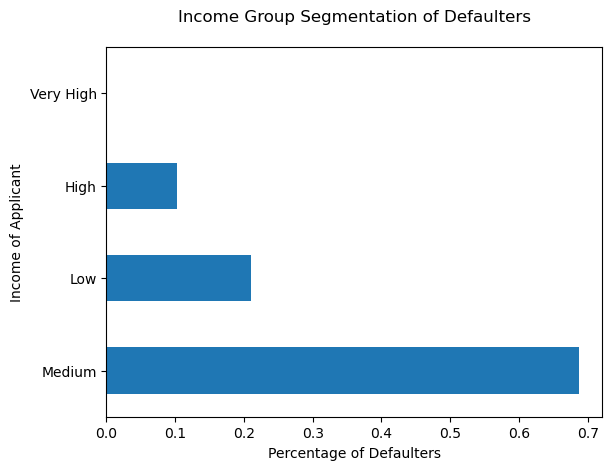

In [53]:
inp1[inp1.TARGET==1].INCOME_BUCKET.value_counts(normalize=True).plot.barh()

plt.xlabel("Percentage of Defaulters", fontdict={"fontsize":10})
plt.ylabel("Income of Applicant", fontdict={"fontsize":10})
plt.title("Income Group Segmentation of Defaulters\n", fontdict={"fontsize":12})

plt.show()

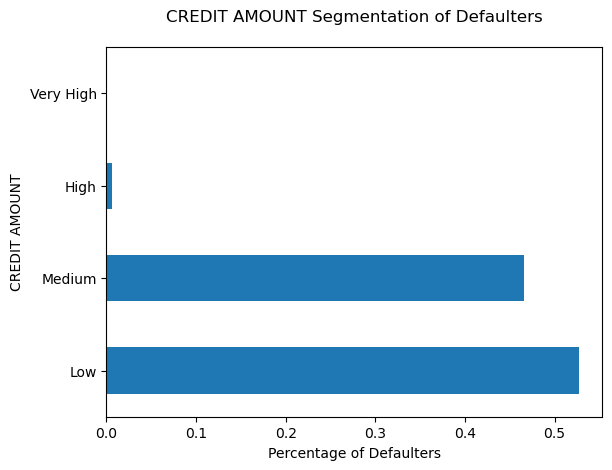

In [54]:
inp1[inp1.TARGET==1].CREDIT_BUCKET.value_counts(normalize=True).plot.barh()

plt.xlabel("Percentage of Defaulters", fontdict={"fontsize":10})
plt.ylabel("CREDIT AMOUNT", fontdict={"fontsize":10})
plt.title("CREDIT AMOUNT Segmentation of Defaulters\n", fontdict={"fontsize":12})

plt.show()

Defaulters are particularly concentrated in the region of low-income and low-credit amount. A new variable like ratio of credit approved to income could help us discover greater insights into the driving factors of defaulting clients.

In [55]:
inp1["CREDIT_INCOME_RATIO"] = inp1.AMT_CREDIT/inp1.AMT_INCOME_TOTAL
inp1.head()
inp1["CIR_BUCKET"] = pd.cut(inp1["CREDIT_INCOME_RATIO"], bins = [0,2.5,5,10,1000000], labels=["L","M","H","VH"])

In [56]:
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AGE,YEARS_EMPLOYED,INCOME_BUCKET,CREDIT_BUCKET,CREDIT_INCOME_RATIO,CIR_BUCKET
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,1,0,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,Business Entity Type 3,0.262949,-1134.0,1,0,0,0,26.0,1.745205,Medium,Medium,2.007889,L
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,1,0,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,School,0.622246,-828.0,1,0,0,0,46.0,3.254795,High,Medium,4.790750,M
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-4260.0,-2531,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,Government,0.555912,-815.0,0,0,0,0,52.0,0.616438,Low,Low,2.000000,L
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-9833.0,-2437,1,0,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,Business Entity Type 3,0.650442,-617.0,1,0,0,0,52.0,8.326027,Medium,Low,2.316167,L
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-4311.0,-3458,1,0,0,0,1.0,2,2,THURSDAY,11,0,0,0,1,1,Religion,0.322738,-1106.0,0,0,0,1,55.0,8.323288,Medium,Low,4.222222,M


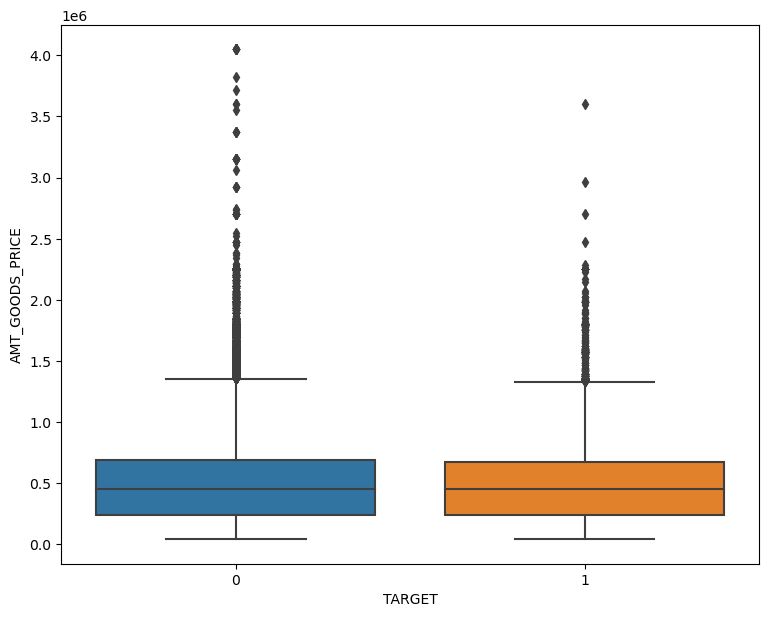

In [57]:
plt.figure(figsize=[9,7])
sns.boxplot(x = "TARGET", y = "AMT_GOODS_PRICE", data = inp1)
plt.show()

Applicants with academic degree among the defaulters are being approved for disproportionately high credit among as compared to other educational qualifications. On the other hand, applicants making timely repayments have a relatively low discrepancy when it comes to the credit amount.

This could be because the sanctioning officer might be considering educational qualifications of applicants with higher weightage, even though there are signs of defaulting.

### Segmented Univariate Analysis

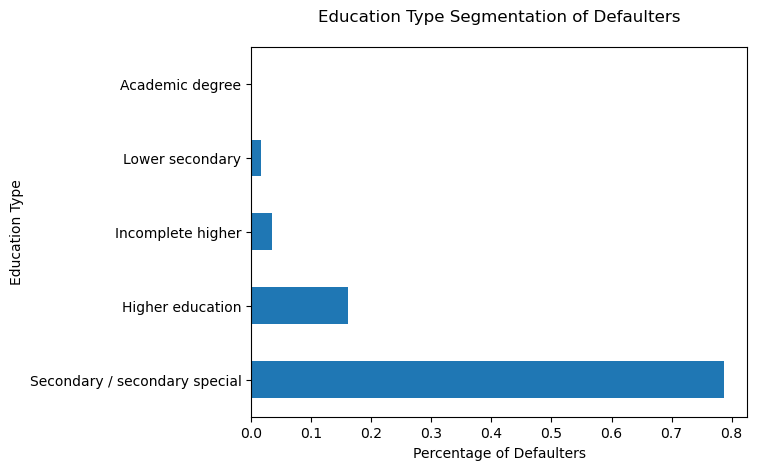

In [58]:
inp1[inp1.TARGET==1].NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()

plt.xlabel("Percentage of Defaulters", fontdict={"fontsize":10})
plt.ylabel("Education Type", fontdict={"fontsize":10})
plt.title("Education Type Segmentation of Defaulters\n", fontdict={"fontsize":12})

plt.show()

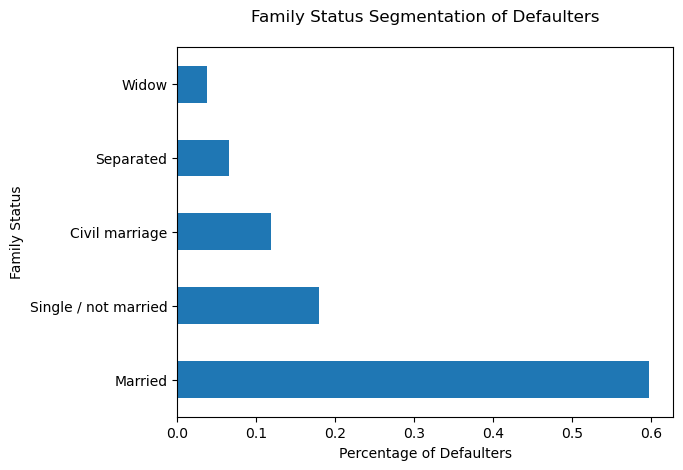

In [59]:
inp1[inp1.TARGET==1].NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()

plt.xlabel("Percentage of Defaulters", fontdict={"fontsize":10})
plt.ylabel("Family Status", fontdict={"fontsize":10})
plt.title("Family Status Segmentation of Defaulters\n", fontdict={"fontsize":12})

plt.show()

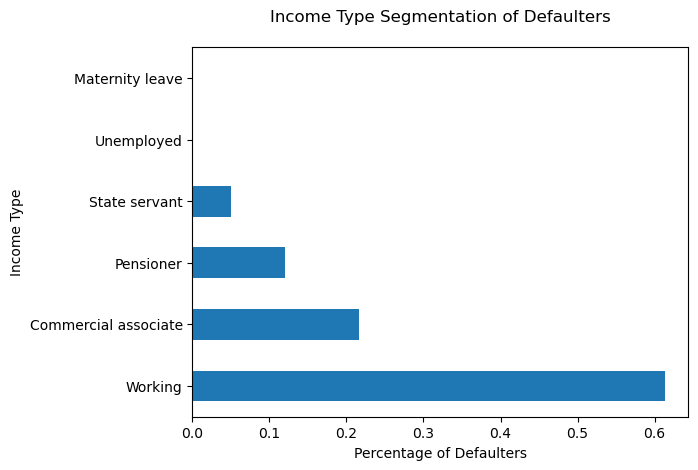

In [60]:
inp1[inp1.TARGET==1].NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()

plt.xlabel("Percentage of Defaulters", fontdict={"fontsize":10})
plt.ylabel("Income Type", fontdict={"fontsize":10})
plt.title("Income Type Segmentation of Defaulters\n", fontdict={"fontsize":12})

plt.show()

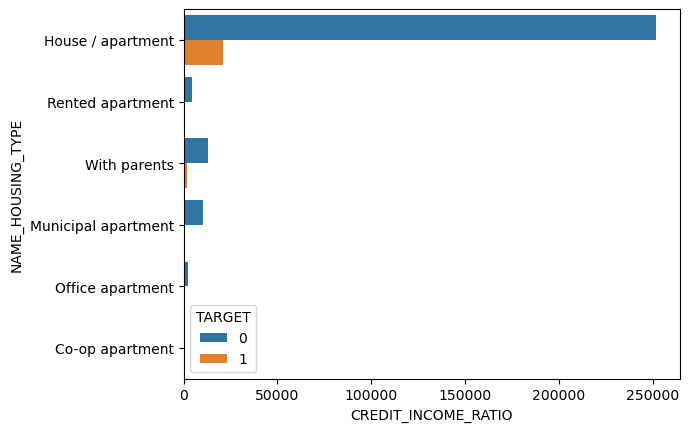

In [61]:
sns.barplot(y = "NAME_HOUSING_TYPE" ,x = "CREDIT_INCOME_RATIO", hue="TARGET",
            data = inp1, estimator=len, ci=None)
plt.show()

Income type, organization type, family status, and housing type follow similar trends for both defaulters and non-defaulters with the most common entries being working, house/apartment, married, and business entity 3 respectively.

In [62]:
# Distribution of income type for defaulters
inp1[inp1.TARGET == 1].NAME_INCOME_TYPE.value_counts()

Working                 15224
Commercial associate     5360
Pensioner                2982
State servant            1249
Unemployed                  8
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64

In [63]:
# Distribution of income type for non-defaulters
inp1[inp1.TARGET == 0].NAME_INCOME_TYPE.value_counts()

Working                 143550
Commercial associate     66257
Pensioner                52380
State servant            20454
Student                     18
Unemployed                  14
Businessman                 10
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

In [64]:
# Distribution of housing type for defaulters
inp1[inp1.TARGET == 1].NAME_HOUSING_TYPE.value_counts(normalize = True)

House / apartment      0.856878
With parents           0.069930
Municipal apartment    0.038469
Rented apartment       0.024209
Office apartment       0.006928
Co-op apartment        0.003585
Name: NAME_HOUSING_TYPE, dtype: float64

In [65]:
# Distribution of income type for defaulters
inp1[inp1.TARGET == 0].NAME_HOUSING_TYPE.value_counts(normalize = True)

House / apartment      0.890019
With parents           0.046355
Municipal apartment    0.036181
Rented apartment       0.015140
Office apartment       0.008649
Co-op apartment        0.003654
Name: NAME_HOUSING_TYPE, dtype: float64

In [66]:
inp1[inp1.TARGET == 1].NAME_FAMILY_STATUS.value_counts(normalize = True)

Married                 0.598187
Single / not married    0.179537
Civil marriage          0.119275
Separated               0.065257
Widow                   0.037744
Name: NAME_FAMILY_STATUS, dtype: float64

In [67]:
inp1[inp1.TARGET == 0].NAME_FAMILY_STATUS.value_counts(normalize = True)

Married                 0.642345
Single / not married    0.144991
Civil marriage          0.094854
Separated               0.064206
Widow                   0.053597
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

In [68]:
inp1[inp1.TARGET == 1].ORGANIZATION_TYPE.value_counts(normalize = True)

Business Entity Type 3    0.254703
Self-employed             0.157422
XNA                       0.120443
Other                     0.051360
Business Entity Type 2    0.036254
Construction              0.031621
Trade: type 7             0.029809
Medicine                  0.029688
Government                0.029245
School                    0.021188
Transport: type 4         0.020181
Business Entity Type 1    0.019617
Kindergarten              0.019496
Trade: type 3             0.014542
Industry: type 3          0.014018
Security                  0.013051
Agriculture               0.010352
Housing                   0.009466
Industry: type 11         0.009426
Industry: type 9          0.009063
Restaurant                0.008540
Transport: type 3         0.007533
Postal                    0.007331
Transport: type 2         0.006928
Military                  0.005438
Trade: type 2             0.005358
Bank                      0.005237
Police                    0.004713
Industry: type 1    

In [69]:
inp1[inp1.TARGET == 0].ORGANIZATION_TYPE.value_counts(normalize = True)

Business Entity Type 3    0.218154
XNA                       0.185308
Self-employed             0.122058
Other                     0.054506
Medicine                  0.036988
Government                0.034236
Business Entity Type 2    0.034147
School                    0.029598
Trade: type 7             0.025084
Kindergarten              0.022626
Construction              0.020999
Business Entity Type 1    0.019446
Transport: type 4         0.017323
Industry: type 9          0.011118
Trade: type 3             0.011076
Industry: type 3          0.010365
Security                  0.010340
Housing                   0.009633
Military                  0.008840
Industry: type 11         0.008738
Bank                      0.008409
Police                    0.007867
Agriculture               0.007772
Transport: type 2         0.007188
Postal                    0.006987
Security Ministries       0.006643
Trade: type 2             0.006251
Restaurant                0.005656
Services            

Majority of applicants in the data set are females (65%), thereby causing a slight imbalance.

In [70]:
inp1.CODE_GENDER.value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [71]:
inp1[inp1.TARGET == 1].CODE_GENDER.value_counts(normalize=True)

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64

In [72]:
inp1[inp1.TARGET == 0].CODE_GENDER.value_counts(normalize=True)

F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64

35% of defaulters fall in the age bucket of 21-34 and are hence skewed in favor of young adults. If we look at the non-defaulters no such patterns emerge, the applicants are almost euqally spread out across all age ranges

In [73]:
 pd.qcut(inp1["AGE"], 4, retbins=True)

(0         (20.999, 34.0]
 1           (43.0, 54.0]
 2           (43.0, 54.0]
 3           (43.0, 54.0]
 4           (54.0, 69.0]
                ...      
 307506    (20.999, 34.0]
 307507      (54.0, 69.0]
 307508      (34.0, 43.0]
 307509    (20.999, 34.0]
 307510      (43.0, 54.0]
 Name: AGE, Length: 307511, dtype: category
 Categories (4, interval[float64]): [(20.999, 34.0] < (34.0, 43.0] < (43.0, 54.0] < (54.0, 69.0]],
 array([21., 34., 43., 54., 69.]))

In [74]:
inp1["AGE_BUCKET"] = pd.qcut(inp1["AGE"], 4, labels=False)

In [75]:
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AGE,YEARS_EMPLOYED,INCOME_BUCKET,CREDIT_BUCKET,CREDIT_INCOME_RATIO,CIR_BUCKET,AGE_BUCKET
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-3648.0,-2120,1,0,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,Business Entity Type 3,0.262949,-1134.0,1,0,0,0,26.0,1.745205,Medium,Medium,2.007889,L,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1186.0,-291,1,0,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,School,0.622246,-828.0,1,0,0,0,46.0,3.254795,High,Medium,4.790750,M,2
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-4260.0,-2531,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,Government,0.555912,-815.0,0,0,0,0,52.0,0.616438,Low,Low,2.000000,L,2
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-9833.0,-2437,1,0,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,Business Entity Type 3,0.650442,-617.0,1,0,0,0,52.0,8.326027,Medium,Low,2.316167,L,2
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-4311.0,-3458,1,0,0,0,1.0,2,2,THURSDAY,11,0,0,0,1,1,Religion,0.322738,-1106.0,0,0,0,1,55.0,8.323288,Medium,Low,4.222222,M,3


In [76]:
inp1[inp1.TARGET == 1].AGE_BUCKET.value_counts(normalize = True)

0    0.355368
1    0.263041
2    0.228036
3    0.153555
Name: AGE_BUCKET, dtype: float64

In [77]:
inp1[inp1.TARGET == 0].AGE_BUCKET.value_counts(normalize = True)

2    0.256645
0    0.253882
1    0.246160
3    0.243312
Name: AGE_BUCKET, dtype: float64

In [78]:
inp1["INCOME_BUCKET"] = pd.qcut(inp1["AMT_INCOME_TOTAL"], 4, labels=False)

In [79]:
inp1[inp1.TARGET == 1].INCOME_BUCKET.value_counts(normalize = True)

0    0.340101
2    0.278026
3    0.199114
1    0.182759
Name: INCOME_BUCKET, dtype: float64

<AxesSubplot:>

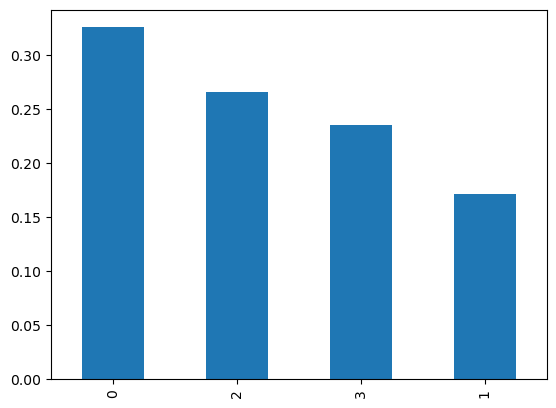

In [80]:
inp1[inp1.TARGET == 0].INCOME_BUCKET.value_counts(normalize = True).plot.bar()

#### Correlations

Finding correlation between numerical variables from application_data namely:
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_GOODS_PRICE
- AMT_ANNUITY
- AGE
- YEARS_EMPLOYED

In [81]:
corr_def = inp1[inp1.TARGET==1][["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_GOODS_PRICE","AMT_ANNUITY","AGE","YEARS_EMPLOYED", "REGION_POPULATION_RELATIVE"]]
corr_non_def = inp1[inp1.TARGET==0][["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_GOODS_PRICE","AMT_ANNUITY","AGE","YEARS_EMPLOYED", "REGION_POPULATION_RELATIVE"]]

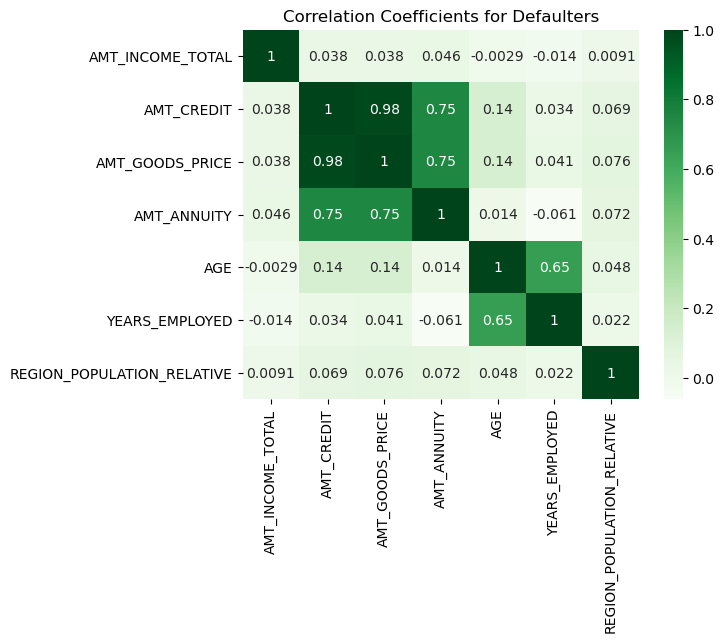

In [82]:
sns.heatmap(corr_def.corr(), annot=True, cmap="Greens")
plt.title("Correlation Coefficients for Defaulters")
plt.show()

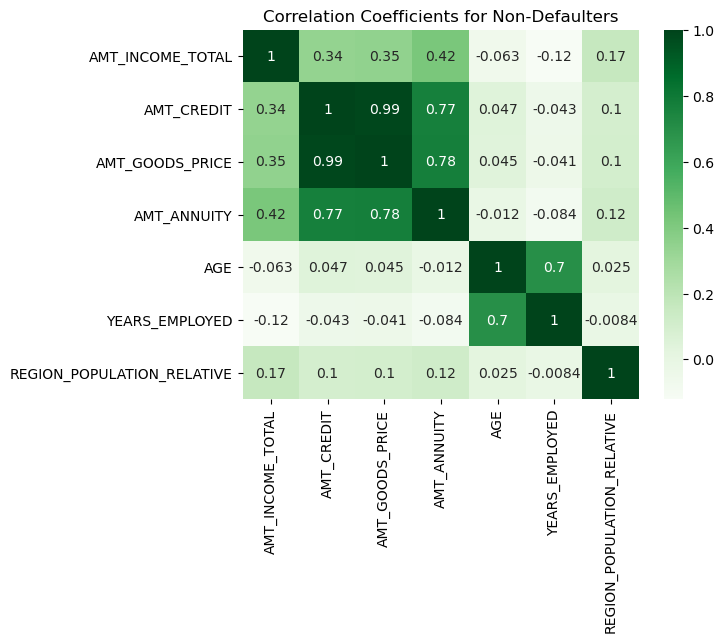

In [83]:
sns.heatmap(corr_non_def.corr(), annot=True, cmap="Greens")
plt.title("Correlation Coefficients for Non-Defaulters")
plt.show()

### Merging application and previous application data

In [84]:
inp0.shape

(1670214, 23)

In [85]:
comb_df = inp0.merge(inp1, how='left', on="SK_ID_CURR", suffixes=('_0', '_1'), copy=True, indicator=False, validate=None)

In [86]:
comb_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_0,AMT_APPLICATION,AMT_CREDIT_0,WEEKDAY_APPR_PROCESS_START_0,HOUR_APPR_PROCESS_START_0,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET,NAME_CONTRACT_TYPE_1,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_1,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_1,HOUR_APPR_PROCESS_START_1,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AGE,YEARS_EMPLOYED,INCOME_BUCKET,CREDIT_BUCKET,CREDIT_INCOME_RATIO,CIR_BUCKET,AGE_BUCKET
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest,0.0,Cash loans,F,N,Y,1.0,225000.0,533668.5,25803.0,477000.0,State servant,Incomplete higher,Married,House / apartment,0.046220,-8447.0,-4120.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,TUESDAY,17.0,1.0,1.0,0.0,0.0,0.0,Military,0.683797,-548.0,0.0,0.0,0.0,0.0,40.0,20.252055,3.0,Medium,2.371860,L,1.0
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low,0.0,Revolving loans,F,N,N,0.0,90000.0,135000.0,6750.0,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-5455.0,-4263.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,SUNDAY,10.0,0.0,0.0,0.0,0.0,0.0,Self-employed,0.663524,-517.0,0.0,0.0,0.0,0.0,58.0,3.438356,0.0,Low,1.500000,L,3.0
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high,0.0,Cash loans,F,N,Y,3.0,40500.0,284400.0,16456.5,225000.0,Working,Secondary / secondary special,Married,House / apartment,0.025164,-1673.0,-1964.0,1.0,0.0,0.0,0.0,5.0,2.0,2.0,TUESDAY,9.0,0.0,0.0,0.0,0.0,0.0,Postal,0.250565,-301.0,1.0,0.0,0.0,0.0,29.0,3.224658,0.0,Low,7.022222,H,0.0
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle,0.0,Cash loans,M,Y,Y,0.0,315000.0,1687266.0,64395.0,1575000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.025164,-2727.0,-2860.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,TUESDAY,7.0,0.0,0.0,0.0,0.0,0.0,XNA,0.663817,-734.0,1.0,0.0,0.0,0.0,61.0,41.000000,3.0,Medium,5.356400,H,3.0
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high,0.0,Cash loans,F,N,N,1.0,180000.0,628069.5,34200.0,499500.0,State servant,Secondary / secondary special,Married,House / apartment,0.028663,-4331.0,-2698.0,1.0,0.0,0.0,0.0,3.0,2.0,2.0,MONDAY,8.0,1.0,0.0,1.0,1.0,1.0,Security Ministries,0.560157,-280.0,1.0,0.0,0.0,0.0,27.0,6.868493,2.0,Medium,3.489275,M,0.0
